In [123]:
"""Data modeling based on NumPy."""
# https://colab.research.google.com/drive/1z-LCnqxVau7coHGVtQjNvYH1I8NlnOyg?usp=sharing#scrollTo=O54wJh_zlUpU
# https://skillbox.ru/media/code/perestanovki-sochetaniya-i-razmeshcheniya-starterpak-po-kombinatorike-dlya-it/

'Data modeling based on NumPy.'

The `random` module is a module that allows you to generate 
pseudorandom numbers and thus simulate random events.

### Random Variable

- Let's consider an **event** A, such as rolling a five on a die.  
  This is a **random** event because it may or may not happen.

- A **trial** or **experiment** is the process of rolling a die.  
  The **elementary outcomes** (denoted as ω₁, ω₂, ..., ω₆) are the possible results — the faces of the die numbered from 1 to 6.

- The **sample space** (denoted as Ω) is the set of all elementary outcomes:

  Ω = { ω₁, ω₂, ω₃, ω₄, ω₅, ω₆ }

A **random variable** (random variable) X is the numerical value of the outcome of an experiment.  
At the same time, we are referring to the function ξ (xi), which maps the set of elementary outcomes ωᵢ to some numerical set:  
xᵢ = ξ(ωᵢ).


### Classical (Theoretical) Probability

Let **k** be the number of favorable outcomes for an event **A** (i.e. outcomes that lead to the occurrence of **A**), and **n** be the total number of equally likely outcomes.  
Then the theoretical probability of event **A** is:

**P(A) = k / n**

The probability of any event **lies in the range from 0 to 1**.  
An event with probability 0 is **impossible**, and with probability 1 is **certain**.  
All random events lie somewhere in between.

The **sum of the probabilities of all mutually exclusive outcomes that form a complete group is always 1**.  


### Relative (Empirical) Probability

Empirical probability of an event is the ratio of the number of times event **A** occurs to the total number of trials.  

In this case, the number of trials (rolls) is small, so the empirical probability differs significantly from the theoretical probability.  
What happens if we significantly increase the number of trials?

### Law of Large Numbers

The **Law of Large Numbers** states that as the number of trials increases, the **empirical probability** begins to approach the **theoretical probability**.


The `random` Module from the NumPy Library

### Coin Tossing

Coin tossing can be simulated by representing heads and tails as 0 and 1, and generating the corresponding values randomly.  
For this, we can use the **`np.random.randint()`** function.

This function takes the boundaries of a range (note: the upper boundary is **not** included in the range),  
and returns randomly generated integers (pseudorandom) within that range.

In [ ]:
# Import required libraries
import itertools
import math
from itertools import product

import matplotlib.pyplot as plt

# now using the random module
import numpy as np

# A boxplot, like many other plots, is conveniently built using the Pandas library
import pandas as pd

# Use the integrate module from the scipy library
import scipy.integrate as integrate

# Import the seaborn library
import seaborn as sns

# using the scipy library
# Import the binom object from scipy.stats module
# import the shapiro() function
# we can also use the probplot() function from the stats module in scipy
# We'll create a skewed distribution
# using the skewnorm object from the stats module in scipy
# Import the norm object from the stats module of the scipy library
from scipy.stats import binom, norm, probplot, shapiro, skewnorm

# Import diabetes patient data
from sklearn.datasets import load_diabetes

# import the StandardScaler class
from sklearn.preprocessing import StandardScaler

# fmt: off
# isort: skip_file        
# pyupgrade: disable      
# pylint: skip-file       
# flake8: noqa           
# mypy: ignore-errors     
# codespell:disable    

In [125]:
# Probability of a Random Variable
# Coin Tossing

print(np.random.randint(0, 2))
print(np.random.randint(0, 2, 10))

# Throw a dice
print(np.random.randint(1, 7, 10))

0
[1 1 0 1 1 1 0 1 1 0]
[4 6 2 3 6 5 2 2 1 1]


### Monte Carlo method


The Monte Carlo method allows us to study any random process by repeatedly simulating it using a computer.

Repeatedly roll a die, and for each series of trials, calculate the empirical probability of getting a 2 or a 3.
If, as the number of trials increases, the empirical probability in the series approaches 
the theoretical probability, we will be able to confirm the Law of Large Numbers.

#### np.linspace(start, stop, num)
    Generates num linearly spaced values from start to stop.

#### np.logspace(start, stop, num, base=10.0)
    Generates num values logarithmically spaced between base**start and base**stop.

In [126]:
# number of experiments
series = np.logspace(1, 6, dtype="int")
print(series)

[     10      12      15      20      25      32      40      51      65
      82     104     132     167     212     268     339     429     542
     686     868    1098    1389    1757    2222    2811    3556    4498
    5689    7196    9102   11513   14563   18420   23299   29470   37275
   47148   59636   75431   95409  120679  152641  193069  244205  308884
  390693  494171  625055  790604 1000000]


In [127]:
print(np.log10(790604))
print(10 ** np.log10(790604))

5.897959007291967
790604.0000000002


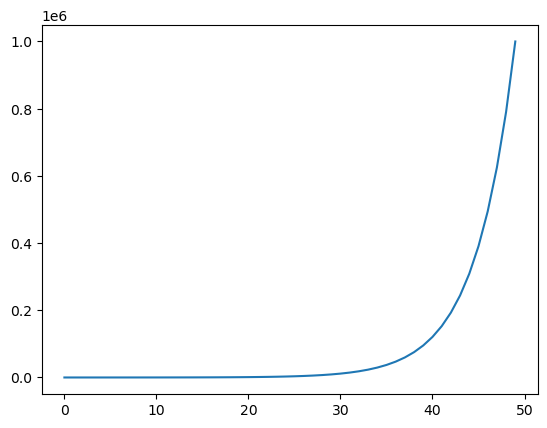

In [128]:
plt.plot(series)

In [ ]:
np.random.seed(42)

success = 0

for i_val, trial in enumerate(series, 1):

    for _ in range(trial):

        result = np.random.randint(1, 7)
        if result == 2 or result == 3:

            success += 1

    prob = success / trial

    print(f"Run: {i_val}\n")
    print(f"Total experiments: {trial}")
    print(f"Successful outcomes: {success}")
    print(f"Empirical probability: {prob}")

    break

Run: 1

Total experiments: 10
Successful outcomes: 5
Empirical probability: 0.5


The empirical probability of the first series, which had only 10 throws (1/2), is far from the theoretical one (1/3).

In [130]:
%%time
np.random.seed(42)

success = 0

prob_list = []

for trial in series:

    for n in range(trial):
        result = np.random.randint(1, 7)

        if result == 2 or result == 3:
            success += 1

    prob = success / trial

    prob_list.append(prob)

    success = 0

print(f"Total of experiments: {len(prob_list)}")

print(f"Empirical probability every 5th run: {np.round(prob_list[::5], 2)}")

Total of experiments: 50
Empirical probability every 5th run: [0.5  0.22 0.34 0.37 0.34 0.33 0.34 0.34 0.33 0.33]
CPU times: total: 2.81 s
Wall time: 9.69 s


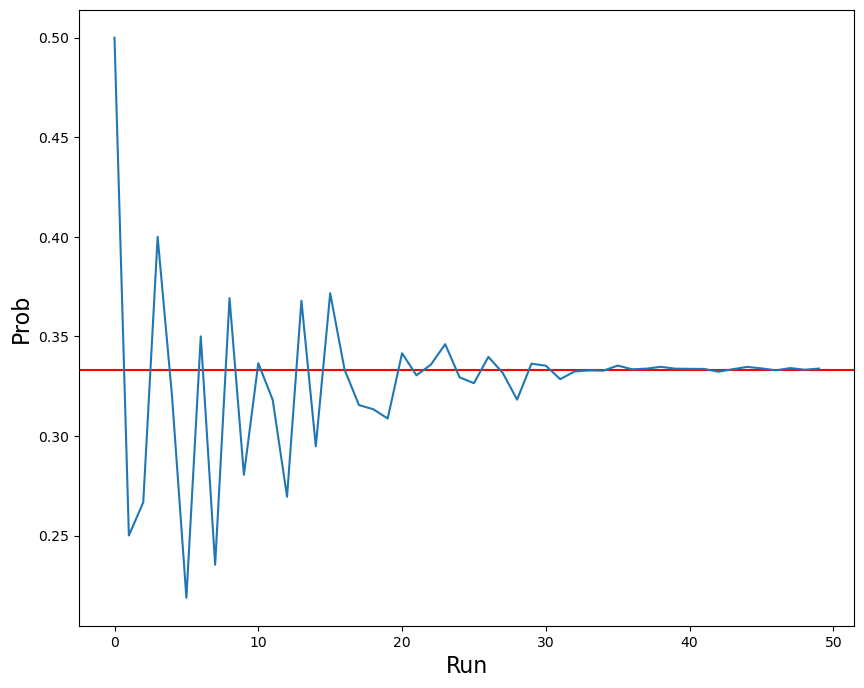

In [131]:
plt.figure(figsize=(10, 8))

plt.axhline(y=1 / 3, c="r")

plt.plot(prob_list)

plt.xlabel("Run", fontsize=16)
plt.ylabel("Prob", fontsize=16)

plt.show()

In [132]:
%%time

# Rewrite to use vectors to speed the process

np.random.seed(42)

prob_list_2 = []

for trial in series:

    result = np.random.randint(1, 7, trial)

    success = (result == 2).sum() + (result == 3).sum()

    prob = success / trial

    prob_list_2.append(prob)

CPU times: total: 0 ns
Wall time: 56.9 ms


In [133]:
# Receive same result for the same input
print(prob_list == prob_list_2)

True


### The Two Envelopes Problem
The two envelopes problem — a popular problem in the field of probability theory. 
Today we will look at one of its variations and simulate the solution using the random module.

Imagine you are given envelope A, you open it and see an amount of money: X. 
After that, you are offered to exchange this envelope for another envelope B, 
which with equal probability contains either half the amount or twice the amount of X.
Should you switch from envelope A to B?

### Analytical Solution

Let’s solve the problem analytically. Suppose the amounts in envelope B can be either X/2 or 2X. Then the expected value of switching envelopes is:

$$
\frac{1}{2} \left(\frac{X}{2}\right) + \frac{1}{2} (2X) = \frac{5}{4}X
$$

This is greater than the initial amount \( X \) in envelope A, which means we should choose envelope B.

Now let’s consider a specific example. Suppose the amount in envelope A is 5000 rubles. Then the expected value when switching envelopes is:

$$
\frac{1}{2} \left(\frac{5000}{2}\right) + \frac{1}{2} (2 \cdot 5000) = \frac{5}{4} \cdot 5000 = 6250
$$


In [134]:
np.random.seed(50)

trials = 100000

outcomes = []

for trial in range(trials):

    outcome = np.random.randint(0, 2)

    if outcome == 0:

        outcomes.append(2500)

    else:

        outcomes.append(10000)

sum(outcomes) / len(outcomes)

6249.475

### The Two Envelopes Paradox
Let us add that if we change the condition of the problem and do not open envelope A, the problem turns into the two envelopes paradox.
After all, if on average it's better to switch from envelope A to B, then the reverse action (switching from B to A) should also be advantageous.

Such an exchange of envelopes could go on forever, which leads to a contradiction — since we previously proved that the initial switch from A to B is more profitable.

A full exploration of this paradox is beyond the scope of today's session.

### Random Walk Method
A random number generator is also used in the so-called random walk method (random walk models, random walkers).
With it, we can construct a path consisting of a sequence of random steps in a certain space and thus model various processes.

### Random Walk on the Number Line
In the simplest version, we will flip a coin and observe whether we move relative to the previous step on the number line. Let’s look at the algorithm.

In [135]:
np.random.seed(2)

moves = [0]

coins = []

for x in range(5):

    coin = np.random.randint(0, 2)

    moves.append(moves[x] + coin)

    coins.append(coin)
print(moves)
print(coins)

[0, 0, 1, 2, 2, 2]
[0, 1, 1, 0, 0]


### Random walk function

**Example:**

Now let’s make the task more complex and see whether we can travel from Moscow to Saint Petersburg 
using a rather unusual mode of transport — one that moves based on the roll of a die. The conditions are as follows:

We need to cover exactly 700 kilometers;

If we roll a 1 or 2, we move forward by 5 kilometers;

If we roll a 3 or 4, we move backward by 5 kilometers;

If we roll a 5 or 6, we roll the die again and move forward by the resulting number multiplied by 5 kilometers;

Additionally, there is a small chance of an unexpected breakdown: less than 0.001 (i.e., less than 0.1%). In that case, we are evacuated and sent back to Moscow for repairs.

We also agree that we cannot move in reverse toward Moscow beyond zero — that is, we cannot go into negative distance. So even if we’re unlucky, the total number of kilometers traveled can’t be negative.

In [136]:
def random_walk():
    """Simulate a 100-step random walk based on dice rolls with special movement rules."""
    random_walk = [0]

    for m in range(99):

        move = random_walk[-1]

        dice = np.random.randint(1, 7)

        if dice <= 2:
            move = move + 5

        elif dice <= 4:
            move = max(0, move - 5)

        else:
            move = move + 5 * np.random.randint(1, 7)

        if np.random.rand() < 0.001:
            move = 0

        random_walk.append(move)

    return random_walk

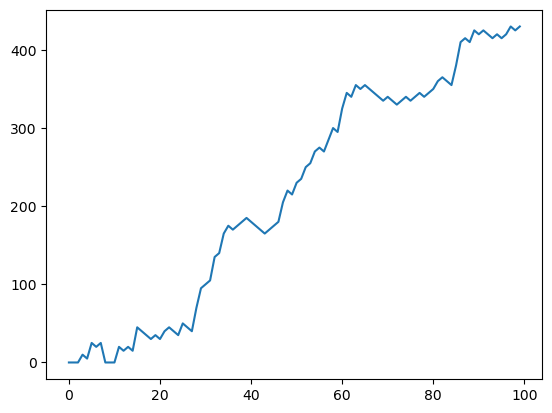

In [137]:
np.random.seed(42)

rw = random_walk()
plt.plot(rw)

In [138]:
rw[-1]

430

### Simulating multiple random walks

In [139]:
np.random.seed(42)

all_walks = []

for w in range(1000):

    rw = random_walk()

    all_walks.append(rw)

print(all_walks)

[[0, 0, 0, 10, 5, 25, 20, 25, 0, 0, 0, 20, 15, 20, 15, 45, 40, 35, 30, 35, 30, 40, 45, 40, 35, 50, 45, 40, 70, 95, 100, 105, 135, 140, 165, 175, 170, 175, 180, 185, 180, 175, 170, 165, 170, 175, 180, 205, 220, 215, 230, 235, 250, 255, 270, 275, 270, 285, 300, 295, 325, 345, 340, 355, 350, 355, 350, 345, 340, 335, 340, 335, 330, 335, 340, 335, 340, 345, 340, 345, 350, 360, 365, 360, 355, 380, 410, 415, 410, 425, 420, 425, 420, 415, 420, 415, 420, 430, 425, 430], [0, 5, 25, 20, 25, 20, 25, 20, 15, 10, 15, 25, 30, 25, 30, 25, 45, 40, 45, 40, 70, 95, 90, 120, 125, 140, 145, 140, 170, 165, 190, 205, 200, 205, 210, 220, 230, 240, 245, 250, 255, 265, 260, 280, 285, 280, 310, 305, 320, 345, 350, 345, 360, 365, 360, 380, 375, 370, 365, 370, 385, 380, 385, 415, 420, 425, 430, 460, 485, 510, 505, 500, 505, 500, 505, 525, 530, 550, 575, 580, 575, 580, 585, 610, 615, 610, 605, 600, 615, 610, 615, 610, 630, 635, 640, 645, 655, 665, 660, 665], [0, 20, 25, 30, 25, 20, 45, 50, 55, 50, 75, 80, 85, 90, 1

In [140]:
# turn list into Numpy array and transpose
all_walks_T = np.array(all_walks).T

print(all_walks_T.shape)

df = pd.DataFrame(all_walks_T)

df.tail()

(100, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
95,415,645,785,565,355,595,545,640,665,585,...,745,715,560,375,690,690,505,605,515,645
96,420,655,790,580,360,590,550,670,670,590,...,740,745,555,390,695,695,530,635,510,675
97,430,665,815,600,355,585,545,675,690,610,...,735,750,575,415,690,705,535,630,515,685
98,425,660,820,605,370,580,540,680,695,605,...,730,745,570,420,695,725,540,625,530,715
99,430,665,815,610,365,585,535,685,700,600,...,755,755,575,415,690,730,545,650,540,730


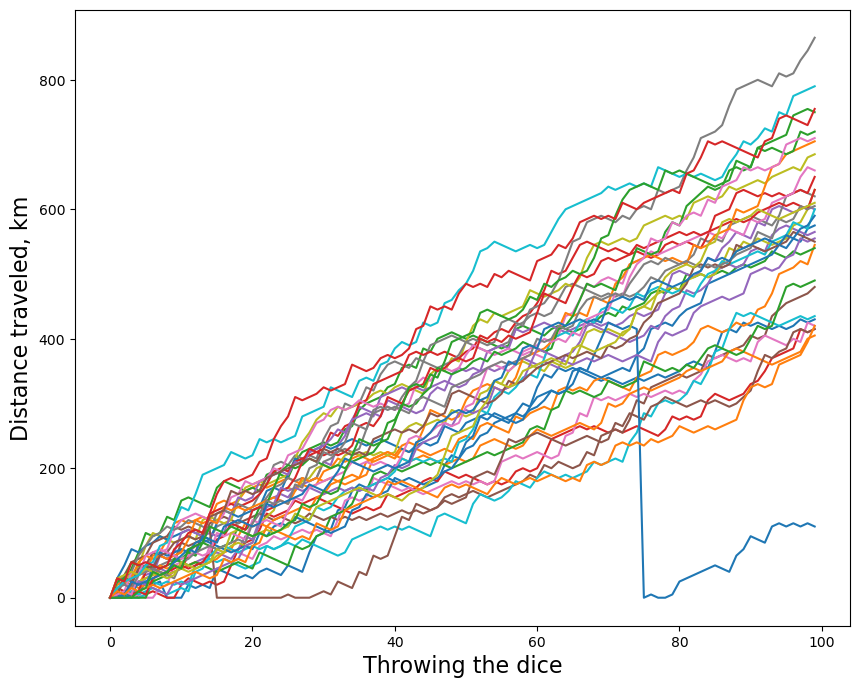

In [141]:
plt.figure(figsize=(10, 8))

plt.plot(all_walks_T[:, ::30])

plt.xlabel("Throwing the dice", fontsize=16)
plt.ylabel("Distance traveled, km", fontsize=16)

plt.show()

Now let's take the achieved endpoints for each of the 1000 trials and look at their distribution using a histogram.

(array([ 19.,  12.,  10.,  22.,  90., 229., 316., 201.,  81.,  20.]),
 array([ 25., 111., 197., 283., 369., 455., 541., 627., 713., 799., 885.]),
 <BarContainer object of 10 artists>)

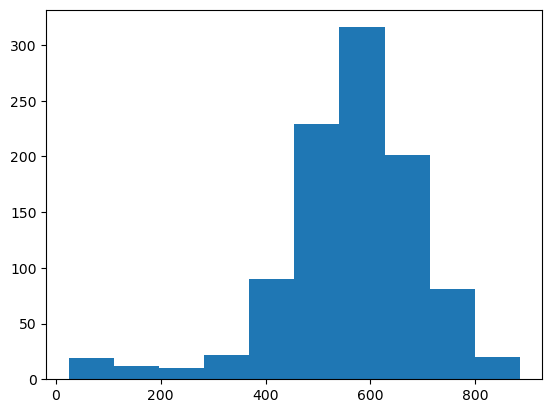

In [142]:
ends = all_walks_T[-1, :]

plt.hist(ends)

In [143]:
ends.mean()
np.count_nonzero(ends >= 700) / len(ends)

0.128

We can also calculate the probability of covering 700 km. To do this, we use the np.count_nonzero()
function to calculate the number of walks that covered the distance between the two capitals and divide the result by the total number of trials.

The vehicle is not very reliable, only 12.8% of the time we reached the final destination.

### Discrete and Continuous Random Variables

Random variables are divided into discrete and continuous types.

### Discrete Random Variable

A discrete random variable is a random variable whose values are finite and countable.

### Continuous Random Variable
A continuous random variable can be obtained as a result of measurements (for example, a person's height, air temperature, waiting time in line, etc.).

On a number line, such a variable can take any value within a specified interval.

### Probability Distribution
Now let’s try to perform a large number of counts (for the discrete variable) and measurements (for the continuous variable), and display them together on one graph. We’ll start with discrete variables.



#### Discrete Probability Distribution
We will roll a die again, but this time we will significantly increase the number of trials.

In [144]:
np.random.seed(42)

dice = np.random.randint(1, 7, 100000)

dice[:10]

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5], dtype=int32)

In [145]:
elements, counts = np.unique(dice, return_counts=True)

print(elements)
print(counts)

[1 2 3 4 5 6]
[16592 16799 16390 16776 16810 16633]


In [146]:
rel_freq = (counts / len(dice)).round(3)
rel_freq

array([0.166, 0.168, 0.164, 0.168, 0.168, 0.166])

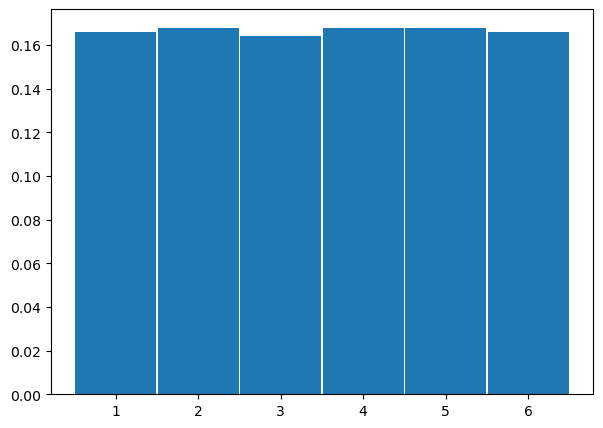

In [147]:
plt.figure(figsize=(7, 5))

plt.bar(elements, rel_freq, width=0.98)
plt.show()

### Discrete Uniform Distribution

Notice that using a graph, we can estimate the probability of each outcome. That’s exactly what a **probability distribution** is for — it helps us evaluate the overall behavior of a random process.

As you can see, the probability of each outcome is approximately the same. This type of distribution is called a **uniform distribution** (discrete uniform distribution). It is used by the `np.random.randint()` function when generating numbers.

> 🔸 *Small discrepancies in the probabilities of each of the six outcomes are due to the fact that we’re using empirical (observed) rather than theoretical probabilities. Theoretically, these probabilities are equal.*

Let’s look at the notation for the uniform distribution:

$$
X \sim U(a, b)
$$

Where:
- \( a \) is the **minimum value**
- \( b \) is the **maximum value**

For a standard die roll:

$$
X \sim U(1, 6)
$$


### Probability Function

In addition to visualizing with graphs, a discrete probability distribution can also be described using a **probability mass function** (pmf).  
This function returns the probability that a random variable will take on a specific value.

In the case of a uniform distribution, the probability of each outcome is equal, and the function is very simple:

$$
\text{pmf} = \frac{1}{n}
$$

The parameter \( n \) can be calculated using:

$$
n = b - a + 1
$$

So the probability of each outcome becomes:

$$
\text{pmf} = \frac{1}{6 - 1 + 1} = \frac{1}{6}
$$

Let’s look at this function on a graph:

*Each outcome from \( a \) to \( b \) has equal probability \( \frac{1}{n} \).*

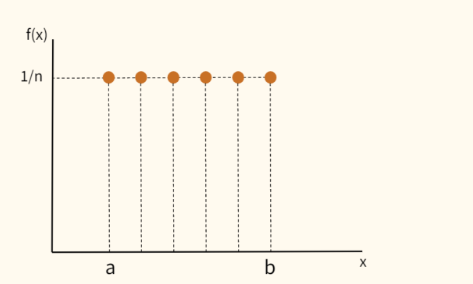


In [148]:
np.sum(rel_freq).round()

np.float64(1.0)

### Cumulative Distribution Function

A probability distribution can also be conveniently described using the **cumulative distribution function** (cdf).

This function returns the probability that a random variable takes on a value **less than or equal to** a given value.

Informally, it shows the “accumulated” probability of outcomes.

---

#### 📘 CDF for a Discrete Uniform Distribution:

The formula is:

$$
cdf(k; a, b) = \frac{\lfloor k \rfloor - a + 1}{b - a + 1}
$$

Where:
- \( k \) is a possible outcome within the range from \( a \) to \( b \), i.e. \( k \in [a, b] \)

---

#### 📊 Example (Die Roll):

Let's compute the probability of rolling a 3 or less (i.e., outcomes 1, 2, or 3):

$$
cdf(3; 1, 6) = \frac{3 - 1 + 1}{6 - 1 + 1} = \frac{3}{6} = \frac{1}{2}
$$

This means there's a 50% chance of rolling 3 or less with a fair 6-sided die.


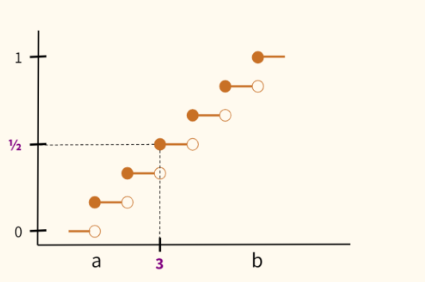

### Expected Value

In addition, a probability distribution is characterized by its **expected value** (mean or average).

The expected value $ \mathbb{E}[X] $ is the weighted average of all possible values of a random variable \( X \), weighted by their probabilities:

$$
\mathbb{E}[X] = \sum_{i=1}^{\infty} x_i p_i
$$

---

#### 🎲 Example: Rolling a Fair Die

For a 6-sided die, the expected value is:

$$
\mathbb{E}[X] = 1 \cdot \frac{1}{6} + 2 \cdot \frac{1}{6} + 3 \cdot \frac{1}{6} + 4 \cdot \frac{1}{6} + 5 \cdot \frac{1}{6} + 6 \cdot \frac{1}{6} = 3.5
$$

---

#### 🟰 Shortcut for Uniform Distribution:

For a discrete uniform distribution from \( a \) to \( b \):

$$
\mathbb{E}[X] = \frac{a + b}{2}
$$

So, for a die:

$$
\mathbb{E}[X] = \frac{1 + 6}{2} = 3.5
$$



In [149]:
np.sum(rel_freq * elements).round(2)

np.float64(3.5)

In [150]:
np.dot(rel_freq, elements).round(2)

np.float64(3.5)

In [151]:
np.mean(dice)

np.float64(3.50312)

### Variance

Another important characteristic of a probability distribution is **variance**.

For a **discrete uniform distribution**, the variance is calculated using the formula:

$$
\mathbb{D}[X] = \frac{n^2 - 1}{12}
$$

---

#### 🎲 Example: Fair Die (n = 6)

$$
\mathbb{D}[X] = \frac{6^2 - 1}{12} = \frac{35}{12} \approx 2.917
$$

Let’s compare this with our distribution.

In [152]:
((6) ** 2 - 1) / 12

2.9166666666666665

In [153]:
np.var(dice)

np.float64(2.9156702656)

### Bernoulli Distribution

Many random processes are characterized by only **two possible outcomes**.  
Examples include:
- Heads or tails when flipping a coin
- Success or failure in a clinical trial

Such processes can be modeled using the **Bernoulli distribution**.

---

#### 🧪 Practical Example

This time, we will simulate flipping a **biased coin** — not a fair one.

Let’s assume:
- Probability of tails \( p = 0.7 \)
- Probability of heads \( = 0.3 \)

Such a coin is called a **biased** or **unfair coin**.

We will simulate flips and record the outcomes.

---

> ⚠️ NumPy does **not** have a built-in Bernoulli function,  
> so we will write our own.

---

#### 🟠 Note:
> In the next chapter, we will use the **binomial distribution** to simulate a Bernoulli experiment.

---

#### 📌 Plan:

- Define a function `bernoulli(p, iter)`  
  - `p` — probability of getting tails (1)  
  - `iter` — number of flips

- Use `np.random.rand()` to generate random values from a uniform distribution \([0, 1]\)

- If the generated value < `p`, we record **tails (1)**  
  Else, we record **heads (0)**

---

Let’s now implement it in Python.


In [ ]:
def bernoulli(p, iter=1):
    """Simulate Bernoulli trials with probability p and iterations."""
    result = np.array([])

    for i in range(iter):

        if np.random.rand() <= p:

            result = np.append(result, 1)

        else:

            result = np.append(result, 0)

    return result

In [155]:
res = bernoulli(0.7, 10000)

values, counts = np.unique(res, return_counts=True)

values, counts, counts / len(res)

(array([0., 1.]), array([3015, 6985]), array([0.3015, 0.6985]))

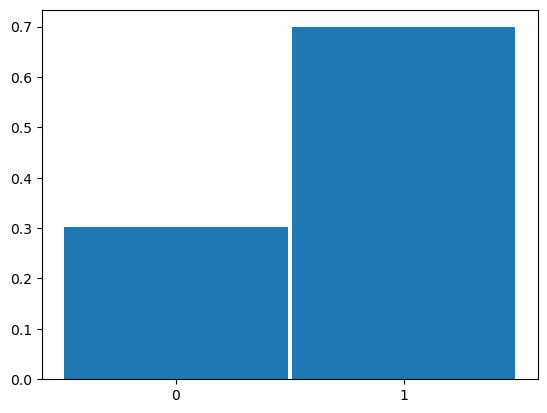

In [156]:
plt.bar(["0", "1"], counts / len(res), width=0.98)
plt.show()

### Binomial Distribution

#### Example with Equal Probability

We’ll continue flipping a coin, but now instead of just once, we’ll flip it **three times per trial** and record the results each time.

There are a total of **8 possible outcomes** for each set of 3 flips.

Let’s denote:
- `H` = heads
- `T` = tails

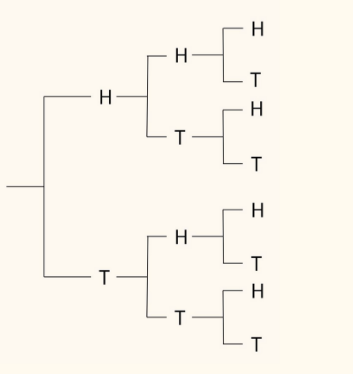

#### Probability of Each Outcome

Each individual combination has probability:

$$
P = \frac{1}{2} \times \frac{1}{2} \times \frac{1}{2} = \frac{1}{8}
$$

This is because the coin is **fair**, so heads and tails are equally likely ($ \frac{1}{2} $ each).


### Binomial Probability: Example with 3 Coin Tosses

We want to calculate the probability of getting **2 heads** (H) in **3 coin tosses**, regardless of order.

---

#### 🧮 Step 1: List all outcomes (2ⁿ = 8)

Each outcome has equal probability:

$$
P = \frac{1}{2} \times \frac{1}{2} \times \frac{1}{2} = \frac{1}{8}
$$

---

#### 🧾 Outcomes with 2 Heads ("Successes")

- HHT  
- HTH  
- THH  

These are **3 combinations**, each with probability  $\frac{1}{8}$ 

So:

$$
P(X = 2) = 3 \times \frac{1}{8} = \frac{3}{8}
$$





> 💡 For completeness:  
> \( P(X = 3) \) is read as the **probability** that the random variable \( X \) takes the value 3.

---

Now let’s plot these probabilities on a graph.

- On the **x-axis**, we will place the possible values of the random variable \( X \)
- On the **y-axis**, we will place the corresponding probabilities \( P(X = x) \)

This will give us a **binomial distribution plot**.


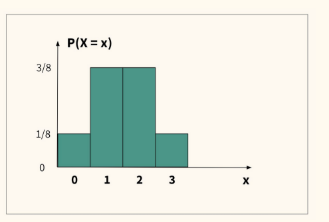

> 📌 Thus, the **binomial distribution** shows the probability of each number of successes  
> from all possible outcome combinations in a series of **identical, independent Bernoulli trials**.


## Example with Unequal Probabilities

Let's slightly change the experiment's conditions. This time, the coin is **biased**:  
- Probability of heads (H): **0.7**  
- Probability of tails (T): **0.3**

We construct a **probability tree diagram** for three coin tosses.

---

### Outcomes and Probabilities

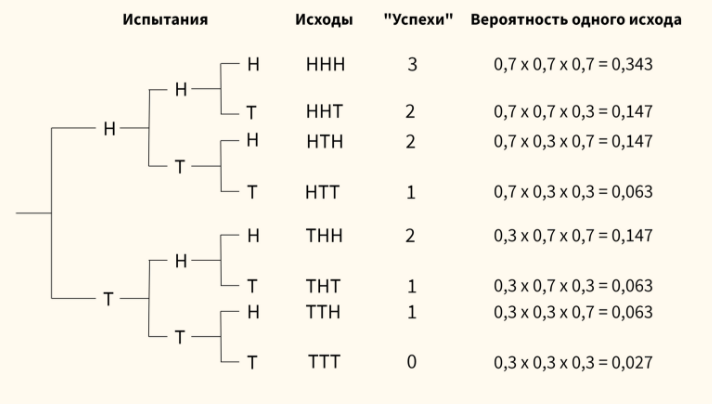

### Probability Distribution of Number of Heads

Now calculate the probability of getting a specific number of heads \( X \):

- $P(X = 1) = 3 \times 0.063 = 0.189$
- $P(X = 2) = 3 \times 0.147 = 0.441$
- $P(X = 0) = 0.027$
- $P(X = 3) = 0.343$

This gives us a non-symmetric binomial-like distribution due to the biased nature of the coin.

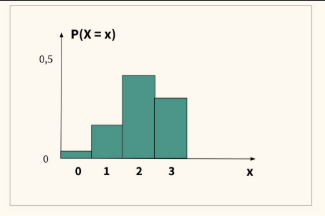


> **Note:** The distribution is asymmetric, with a gentler slope on the left side.  
> This is often described as **left-skewed** (skewed left).  
> 
> If the probability of heads were **0.3** and tails **0.7**, the distribution would take the opposite shape and be **right-skewed** (skewed right).

## Binomial Distribution Formula

So far, we've tossed the coin three times, and the probability of any specific outcome combination is easy to compute using a **probability tree**. However, if we were to toss the coin, say, **10 times**, the number of possible outcomes would reach $2^{10} = 1024$. For such a distribution, we use a **formula**.

To use this formula, we need two components:

1. The **number of possible combinations**.
2. The **probability of each** combination.

---

### Number of Combinations

The number of each possible combination can be found using **Pascal’s Triangle**.  
For example, with 3 coin tosses ($n = 3$), we see that the number of combinations is:


$\{1, 3, 3, 1\}$


which corresponds to our earlier probability tree.




### Binomial Coefficients

You can also calculate the number of combinations using the **binomial coefficient formula**:

$$
\binom{n}{k} = \frac{n!}{k! (n - k)!}
$$

Where:
- $n$ is the number of trials (e.g., coin tosses),
- $k$ is the number of "successes" (e.g., heads).

**Example:**  
Let’s confirm that the number of ways to get **2 heads** ($k = 2$) out of 3 tosses ($n = 3$) is 3:

$$
\binom{3}{2} = \frac{3!}{2!(3 - 2)!} = \frac{3 \times 2 \times 1}{2 \times 1 \times 1} = 3
$$

---

### Probability of Each Combination

The probability of getting exactly $k$ heads in $n$ tosses is:

$$
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

Where:
- $p$ is the probability of heads,
- $k$ is the number of heads,
- $n$ is the total number of tosses.


## Mathematical Expectation and Variance of a Binomial Distribution

For a **binomial distribution** with parameters:

- $n$ — number of trials (experiments),
- $p$ — probability of success in a single trial,

we use the following formulas:

---

### 🧮 Expected Value (Mean)

The **expected number of successes** (mathematical expectation):

$$
\mathbb{E}(X) = n \cdot p
$$

---

### 📊 Variance

The **variance** of the number of successes:

$$
\text{Var}(X) = n \cdot p \cdot (1 - p)
$$

---

### ✅ Example

If we toss a biased coin $n = 3$ times with a probability of heads $p = 0.7$:

- **Expected Value**:
  $$
  \mathbb{E}(X) = 3 \cdot 0.7 = 2.1
  $$

- **Variance**:
  $$
  \text{Var}(X) = 3 \cdot 0.7 \cdot 0.3 = 0.63
  $$


## Binomial Distribution in Python

We can perform the same calculations using Python.  
The function `np.random.binomial()` takes three parameters:

- `n` — number of trials in one experiment (e.g., number of coin tosses)
- `p` — probability of success (e.g., probability of getting heads)
- `size` — number of experiments (i.e., how many times to repeat the set of tosses)

In [157]:
# set the starting point (seed)
np.random.seed(42)

# perform 1,000,000 experiments (size) of three coin tosses (n)
# with the probability of heads being 0.7 (p)
res = np.random.binomial(n=3, p=0.7, size=1000000)

# look at the first 10 values
res[:10]

array([2, 1, 2, 2, 3, 3, 3, 1, 2, 2], dtype=int32)

In [158]:
# count how many times we got 0, 1, 2, or 3 heads
_, counts = np.unique(res, return_counts=True)
print(_)

# look at the relative frequency of each value
counts / len(res)

[0 1 2 3]


array([0.027142, 0.188935, 0.441131, 0.342792])

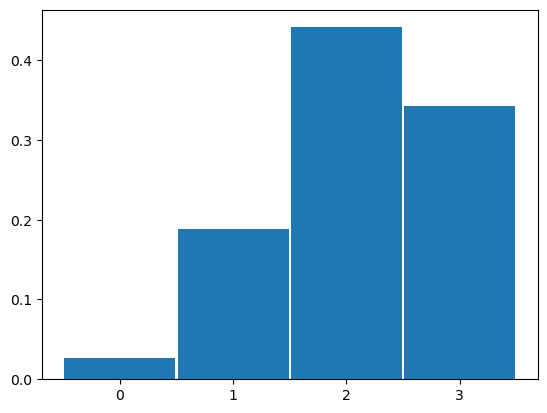

In [159]:
# build plot distribution
plt.bar(["0", "1", "2", "3"], counts / len(res), width=0.98)
plt.show()

In [160]:
np.mean(res)

np.float64(2.099573)

In [161]:
np.var(res)

np.float64(0.6303802176710002)

How can we repeat a Bernoulli trial using the np.random.binomial() function? To do this, it's enough to set the parameter n = 1 (i.e., only one trial or coin toss).

In [162]:
np.random.seed(42)

# the np.random.binomial() function allows us to simulate a Bernoulli trial
# it's enough to set n = 1
res = np.random.binomial(n=1, p=0.7, size=1000000)

# find out the number of zeros and ones in the resulting array
_, counts = np.unique(res, return_counts=True)

# look at the relative frequency of the values
counts / len(res)

array([0.30021, 0.69979])

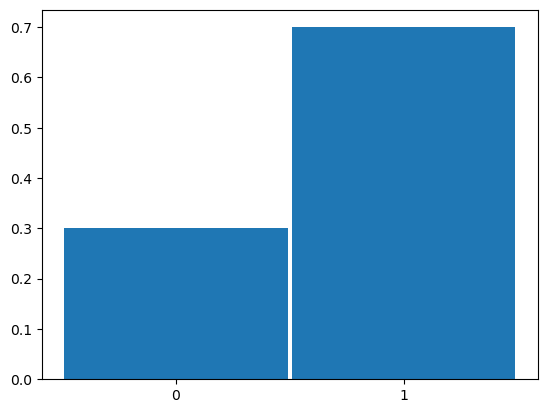

In [163]:
# build plot
plt.bar(["0", "1"], counts / len(res), width=0.98)
plt.show()

# Continuous Probability Distribution

As already mentioned, unlike a discrete variable, a continuous variable can take any value within a given interval.

## Continuous Uniform Distribution

The continuous uniform distribution (continuous uniform distribution) describes a random variable whose probability of values is equal over a given interval from $a$ to $b$.

$$
X \sim U(a, b)
$$

For example, if we know that a bus arrives at a stop every 12 minutes, then the waiting time at the bus stop is uniformly distributed between 0 and 12 minutes.

$$
X \sim U(0, 12)
$$

## Probability Density

A continuous distribution (unlike a discrete one) is defined by a **probability density function** (pdf). For the uniform distribution, the probability density function is defined by the following simple function:

$$
pdf(x) =
\begin{cases}
\frac{1}{b-a}, & x \in [a, b] \\
0, & x \notin [a, b]
\end{cases}
$$

In the bus waiting time example, the probability of arrival at any moment within the interval is:

$$
pdf(x) =
\begin{cases}
\frac{1}{12}, & x \in [0, 12] \\
0, & x \notin [0, 12]
\end{cases}
$$

On the graph, the uniform distribution is represented as a rectangle, the area of which is always equal to one.

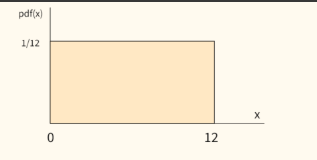


> If we want to calculate the probability of the bus arriving within a specified waiting time interval, we essentially need to compute a specific portion of the area of the rectangle.
Let me know if you’d like to

## Expectation and Variance

We just need to calculate the expectation (average waiting time for the bus) and the variance.

$$
\mathbb{E}[X] = \frac{a + b}{2} = \frac{0 + 12}{2} = 6
$$

$$
\mathbb{D}[X] = \frac{(b - a)^2}{12} = \frac{(12 - 0)^2}{12} = 12
$$

In [164]:
# create a distribution with parameters a = 0 and b = 12
# repeat the experiment 1,000,000 times
res = np.random.uniform(0, 12, 1000000)

# look at the first ten values
res[:10]

array([ 7.14186749,  4.37660571,  0.06450744,  6.73305271, 10.75884493,
        6.38060282,  9.36585218,  1.94345171,  1.64757201, 10.72732251])

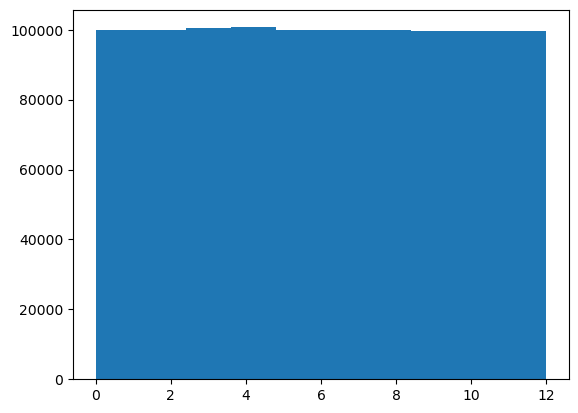

In [165]:
plt.hist(res)
plt.show()

In [166]:
np.mean(res)

np.float64(5.993743863584736)

In [167]:
np.var(res)

np.float64(11.986689948141048)

In [168]:
len(res[res <= 7]) / len(res)

0.584527

The difference between np.random.random(), np.random.rand(), and np.random.uniform

As you may have noticed, we used three functions to generate a uniform distribution.

The function np.random.random(size=None) creates a uniform distribution in the half-open interval [0, 1). The size parameter sets the size of this distribution (i.e., the number of experiments).

In [169]:
# create a 2 x 3 array in the interval [0, 1)
np.random.seed(42)

# to do this, pass the parameters as a tuple
np.random.random((2, 3))

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

In [170]:
# the function np.random.rand() is almost no different from np.random.random(),
# the only difference is that the array dimensions are passed as separate arguments, not as a tuple
np.random.seed(42)
np.random.rand(2, 3)

array([[0.37454012, 0.95071431, 0.73199394],
       [0.59865848, 0.15601864, 0.15599452]])

For the function np.random.uniform(low=0.0, high=1.0, size=None), the interval [0, 1) is the default range, but you can specify any other interval (as we did above).

Here are a few examples.

In [171]:
# generate a single value from a uniform distribution in the interval [0, 9)
np.random.uniform(9)

8.535331102654403

In [172]:
# create a 2 x 5 two-dimensional array with values in the interval [0, 1)
np.random.seed(42)
np.random.uniform(size=(2, 5))

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258]])

Finally, I’ll note that the continuous uniform distribution is a special case of the beta distribution with parameters  
**Beta(1, 1)**.

## Normal Distribution

In our descriptive statistics class, we started exploring quantitative data using the example of men's height in Russia. It's interesting to note that the height of people, as well as many other quantities (e.g., a person's weight, blood pressure, certain natural phenomena, etc.), follow what is called a **normal distribution**.

## Probability Density Function of the Normal Distribution

The probability density function (pdf) of a normal distribution of a random variable $X$ is defined by the **Gauss function**, which is why the normal distribution is also known as the **Gaussian distribution**.

$$
pdf(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 }
$$

As you can see from the formula, the only unknown parameters are $\mu$ ("mu", the mean) and $\sigma$ ("sigma", the standard deviation). These two parameters define the normal distribution.

$$
X \sim \mathcal{N}(\mu, \sigma)
$$

It’s important to note that the **standard deviation** $\sigma$ is the square root of the **variance** $\sigma^2$:

$$
\sigma = \sqrt{\sigma^2}
$$

## Function `np.random.normal()`

In Python, the normal distribution is generated using the `np.random.normal()` function. We have already used it, in particular, to create data on the height of men and women in [a previous notebook](#), around lesson 10 of the introductory course. We'll repeat this code, increasing the dataset size to 100,000.


In [173]:
# Set the random seed
np.random.seed(42)

# Create 100,000 values from a normal distribution with a mean of 180 cm and a standard deviation of 10 cm
height_men = np.round(np.random.normal(180, 10, 100000))

# Create another distribution, but with a mean of 160 cm
height_women = np.round(np.random.normal(160, 10, 100000))

In [174]:
print(height_men[:10])
print(height_women[:10])

[185. 179. 186. 195. 178. 178. 196. 188. 175. 185.]
[170. 148. 166. 154. 157. 160. 159. 143. 174. 171.]


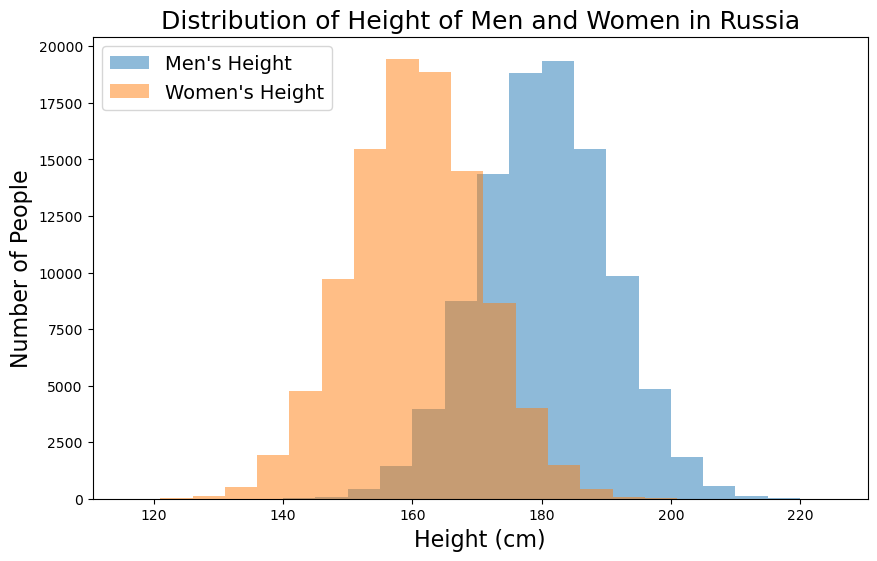

In [175]:
# Display the result using a histogram
plt.figure(figsize=(10, 6))

# Set 18 intervals (bins) and the transparency level (alpha) of the plots
plt.hist(height_men, 18, alpha=0.5, label="Men's Height")
plt.hist(height_women, 18, alpha=0.5, label="Women's Height")

# Set the position and font size of the legend
plt.legend(loc="upper left", prop={"size": 14})

# Add axis labels
plt.xlabel("Height (cm)", fontsize=16)
plt.ylabel("Number of People", fontsize=16)
plt.title("Distribution of Height of Men and Women in Russia", fontsize=18)

plt.show()

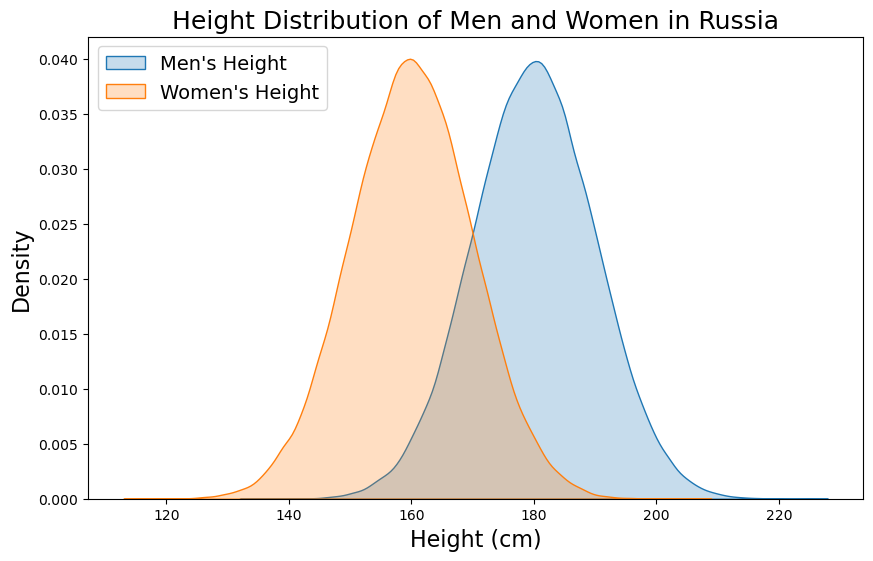

In [176]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the probability density function (KDE plot)
sns.kdeplot(height_men, fill=True, label="Men's Height")
sns.kdeplot(height_women, fill=True, label="Women's Height")

# Set the position and font size of the legend
plt.legend(loc="upper left", prop={"size": 14})

# Add axis labels
plt.xlabel("Height (cm)", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.title("Height Distribution of Men and Women in Russia", fontsize=18)

plt.show()

In [177]:
# Create a DataFrame from a dictionary that includes two arrays with height data
data = pd.DataFrame({"Мужчины": height_men, "Женщины": height_women})
data.head()

,Мужчины,Женщины
0,185.0,170.0
1,179.0,148.0
2,186.0,166.0
3,195.0,154.0
4,178.0,157.0


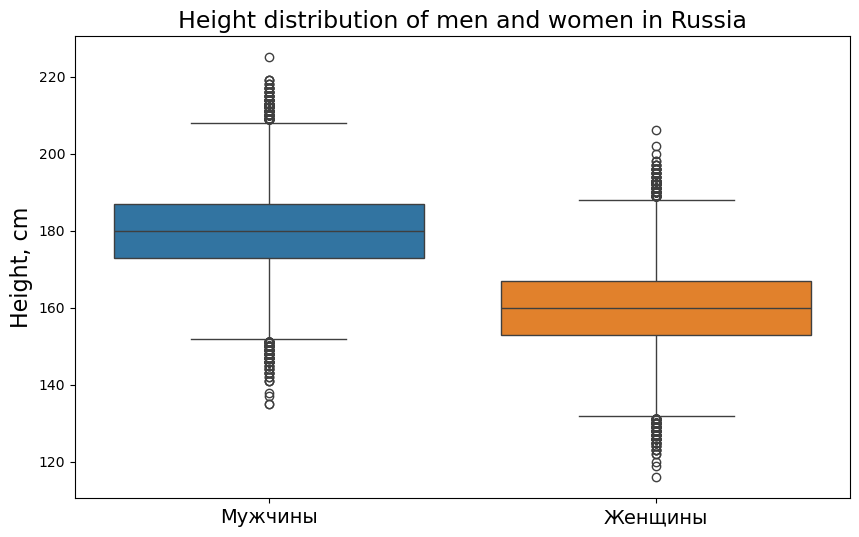

In [178]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Build two vertical boxplots by passing the DataFrame to the data parameter
sns.boxplot(data=data)

# Additionally, set the font size for x-axis labels
plt.xticks(fontsize=14)
# Label for the y-axis
plt.ylabel("Height, cm", fontsize=16)
# And the title of the plot
plt.title("Height distribution of men and women in Russia", fontsize=17)

plt.show()

A boxplot allows you to see the median, the first and third quartiles (Quartile 1, Q1 and Quartile 3, Q3), the interquartile range (IQR), and, importantly, the so-called outliers — values that differ significantly from the average (on the chart above, they are marked as dots). Neither a histogram nor a density plot displays this information.

In the image below, you can see the connection between a boxplot and a density plot.

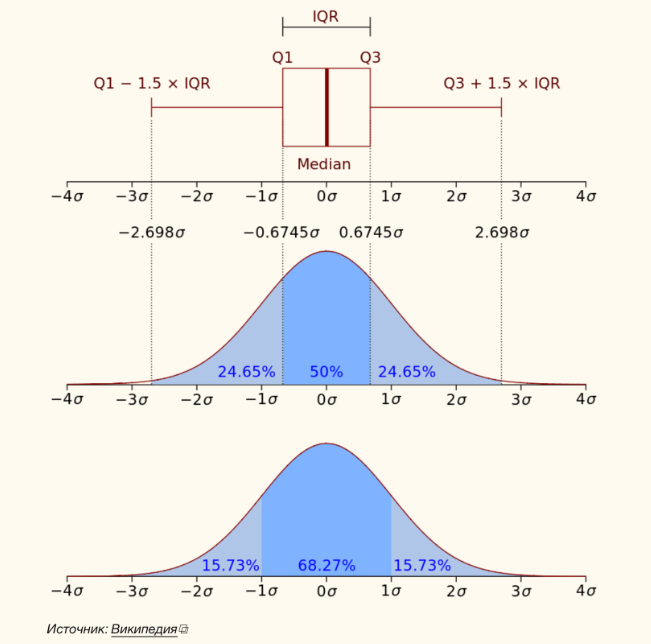

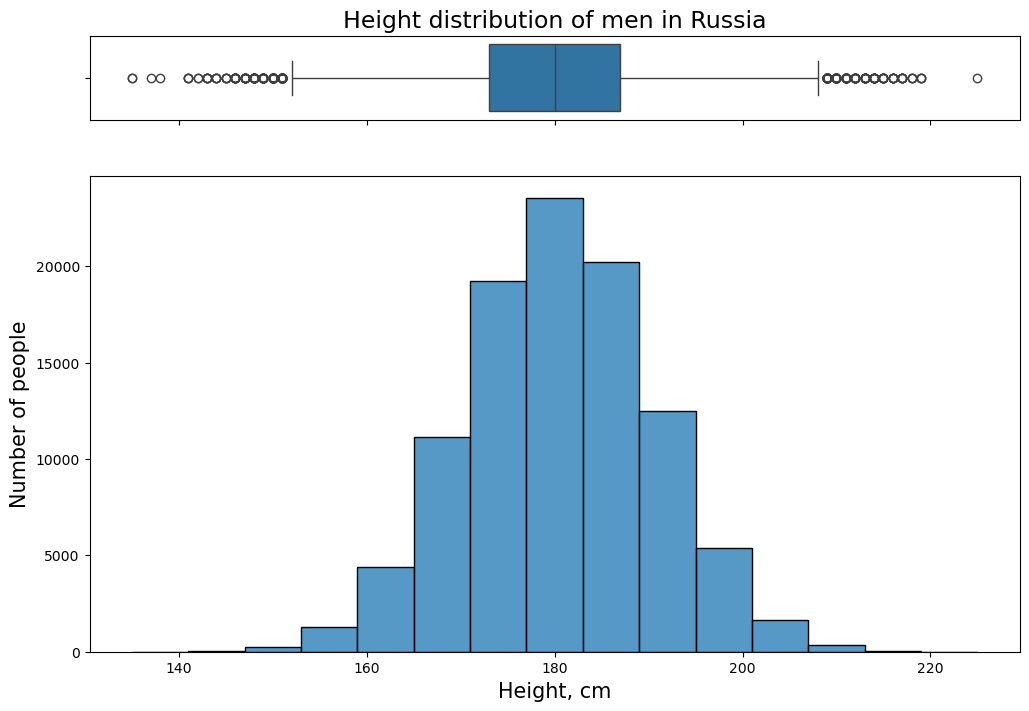

In [179]:
# Create two subplots
f, (ax_box, ax_hist) = plt.subplots(
    nrows=2,  # with two rows
    ncols=1,  # and one column
    sharex=True,  # show x-axis labels only on the bottom plot
    gridspec_kw={"height_ratios": (0.15, 0.85)},  # set different row heights
    figsize=(12, 8),
)  # set the size of the figure

# In the first subplot, draw a boxplot
sns.boxplot(x=height_men, ax=ax_box)
# In the second subplot, draw a histogram
sns.histplot(data=height_men, bins=15, ax=ax_hist)

# Set the title and axis labels
ax_box.set_title("Height distribution of men in Russia", fontsize=17)
ax_hist.set_xlabel("Height, cm", fontsize=15)
ax_hist.set_ylabel("Number of people", fontsize=15)

plt.show()

Now let’s calculate the probability that the height of a randomly encountered person on the street is less than 190 cm.

Of course, in order to make this assumption, we must suppose that our data truly represents the general population — that is, the height of all people.

First, we will calculate the theoretical probability. To create an “ideal” theoretical distribution, we’ll use the scipy library.


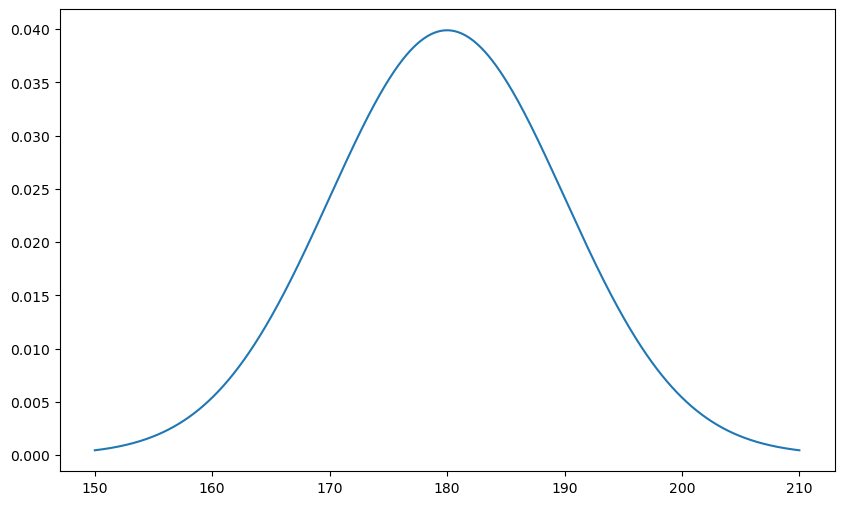

In [180]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Define the mean and standard deviation
mean, std = 180, 10

# Create a space of 1000 points within the range of +/- three standard deviations from the mean
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# Calculate the y-axis values using the .pdf() method
# i.e., the probability density function
f = norm.pdf(x, mean, std)

# Plot the graph
plt.plot(x, f)

plt.show()

Just like with the uniform distribution, the task comes down to finding the area under the curve from negative infinity up to and including 190 cm.

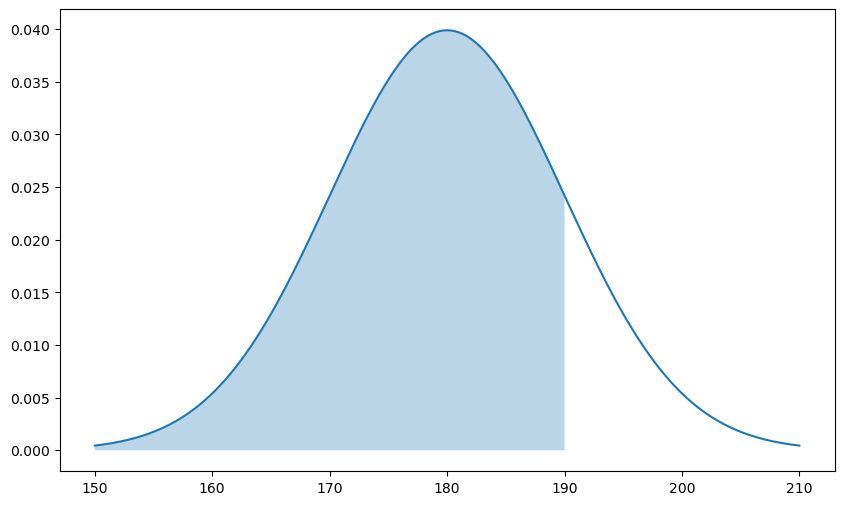

In [181]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Define the mean and standard deviation
mean, std = 180, 10

# Create a space of 1000 points within the range of ±3 standard deviations from the mean
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# Calculate the y-axis values using the .pdf() method
# i.e., the probability density function
f = norm.pdf(x, mean, std)

# Plot the curve
plt.plot(x, f)

# Additionally, create x-values for the shaded area
px = np.linspace(mean - 3 * std, 190, 1000)

# Fill the area under the normal distribution curve down to the x-axis
# within the selected range of x-values
plt.fill_between(px, norm.pdf(px, mean, std), alpha=0.3)

# Display the plot
plt.show()

In [182]:
# Pass the boundary (height), mean (loc), and standard deviation (scale) to the .cdf() method
area = norm.cdf(190, loc=180, scale=10)

# The output will be the area under the curve
area

np.float64(0.8413447460685429)

In [183]:
# Using the .ppf() - Percent Point Function method, we can find the value (height) corresponding to a given area
height = norm.ppf(area, loc=180, scale=10)
height

np.float64(190.0)

In [184]:
# Now calculate the probability of meeting a person taller than 190 cm
1 - norm.cdf(190, loc=180, scale=10)

np.float64(0.15865525393145707)

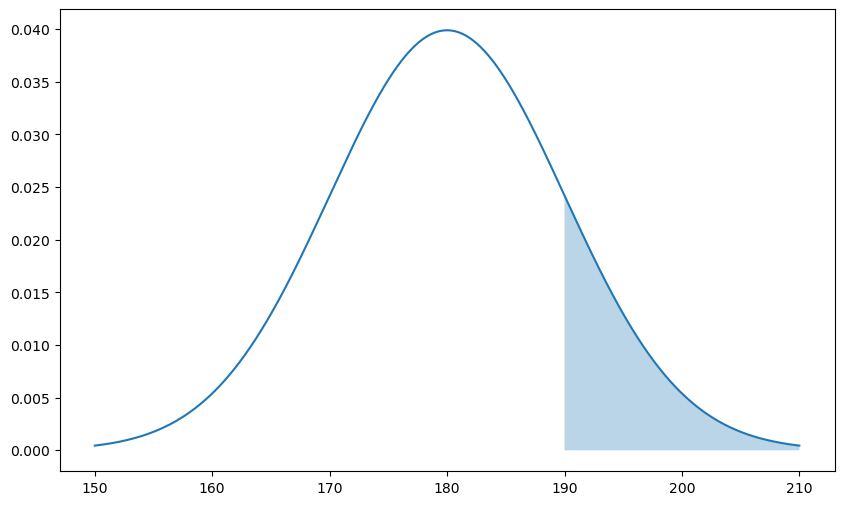

In [185]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Define the mean and standard deviation
mean, std = 180, 10

# Create a space of 1000 points within the range of ±3 standard deviations from the mean
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# Calculate the y-axis values using the .pdf() method
# i.e., the probability density function
f = norm.pdf(x, mean, std)

# Plot the curve
plt.plot(x, f)

# Additionally, create x-values for the shaded area
px = np.linspace(190, mean + 3 * std, 1000)

# Fill the area under the normal distribution curve down to the x-axis
# within the selected range of x-values
plt.fill_between(px, norm.pdf(px, mean, std), alpha=0.3)

# Display the plot
plt.show()

In [186]:
# Calculate the smaller area up to the lower bound
lowerbound = norm.cdf(170, loc=180, scale=10)

# Calculate the larger area up to the upper bound
upperbound = norm.cdf(190, loc=180, scale=10)

# Subtract the smaller area from the larger one
upperbound - lowerbound

np.float64(0.6826894921370859)

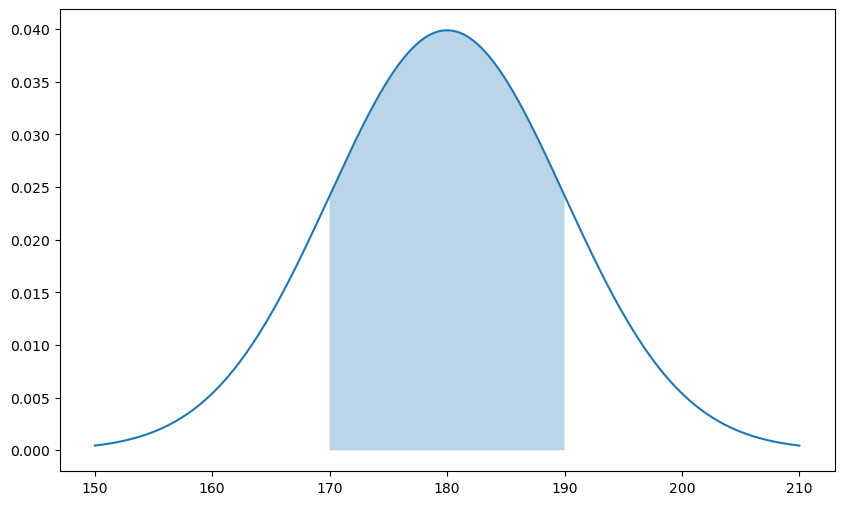

In [187]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Define the mean and standard deviation
mean, std = 180, 10

# Create a space of 1000 points within the range of ±3 standard deviations from the mean
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# Calculate the y-axis values using the .pdf() method
# i.e., the probability density function
f = norm.pdf(x, mean, std)

# Plot the curve
plt.plot(x, f)

# Additionally, create x-values for the shaded area
px = np.linspace(170, 190, 1000)

# Fill the area under the normal distribution curve down to the x-axis
# within the selected range of x-values
plt.fill_between(px, norm.pdf(px, mean, std), alpha=0.3)

# Display the plot
plt.show()

In [188]:
# Divide the number of people with height <= 190 by the total number of observations
len(height_men[height_men <= 190]) / len(height_men)

0.85195

# Probability Density Function and Cumulative Distribution Function

Let's examine the relationship between the **probability density function**, denoted as $P(x)$, and the **cumulative distribution function**, denoted as $D(x)$.

Recall that the **probability density function** (PDF) of a normal distribution is defined by the formula:

$$
P(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2}
$$

From this, we have already learned the following:

1. The probability that a random variable takes a value **no greater than** a given number in the interval $(-\infty; x]$ is equal to the **area under the probability density curve** on that interval.
2. This area is calculated using the **cumulative distribution function (CDF)**.

At the same time, we know that the area under a curve is computed as the **integral** of the function defined by that curve over a given interval.

> 🔶 Therefore, the **cumulative distribution function** $D(x)$ is the **integral of the probability density function** $P(x)$.

### Mathematically, this is expressed as:

$$
D(x) = \int_{-\infty}^{x} P(x)\, dx
$$

> The topic of integration goes beyond the scope of today's lesson, but let’s try to understand on an intuitive level how the **PDF** and **CDF** are related through the concept of the integral.


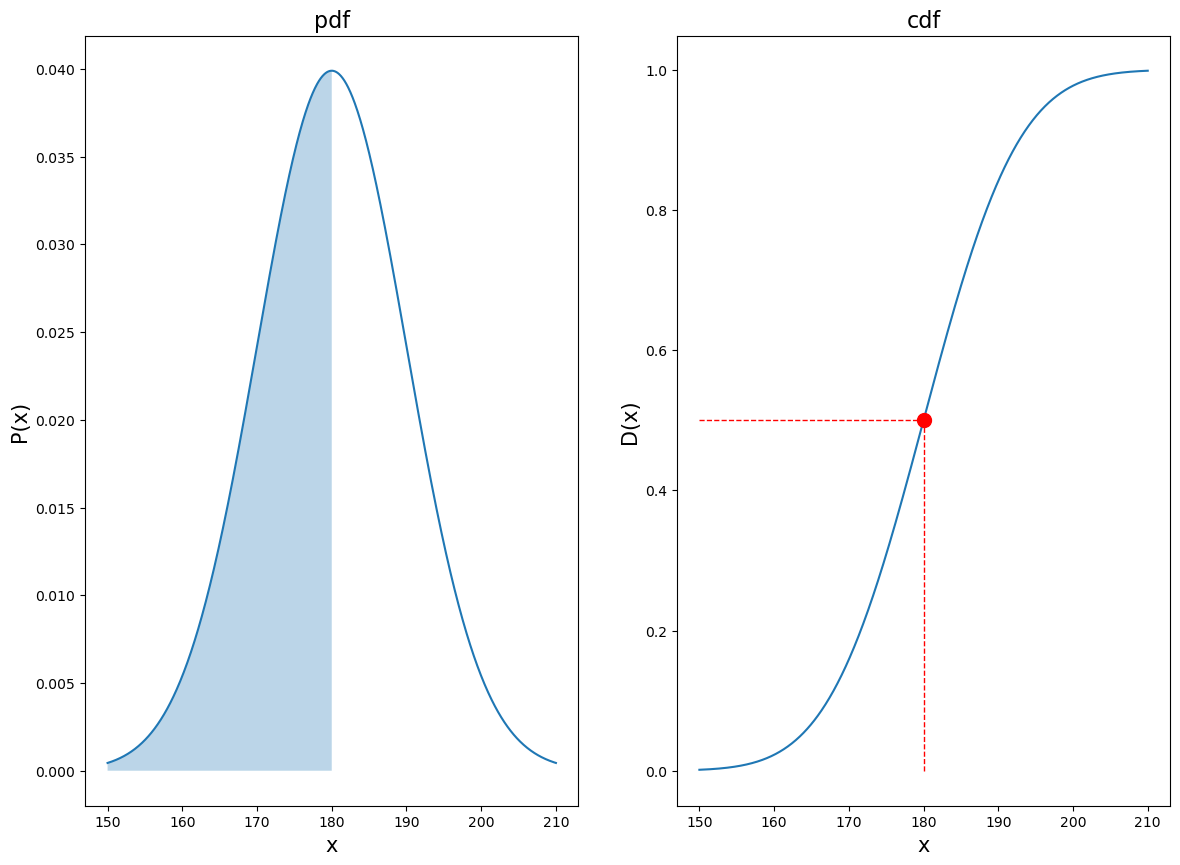

In [189]:
# set the figure size
plt.figure(figsize=(14, 10))

# define the mean and standard deviation
mean, std = 180, 10

# create a sequence of points on the x-axis
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# calculate the probability density function values
y1 = norm.pdf(x, mean, std)

# and the cumulative distribution function values
y2 = norm.cdf(x, mean, std)

# on the left plot (row 1, col 2, index 1)
plt.subplot(1, 2, 1)

# plot the probability density function
plt.plot(x, y1)

# fill the area under the curve up to x = 180
px = np.linspace(mean - 3 * std, 180, 1000)
plt.fill_between(px, norm.pdf(px, mean, std), alpha=0.3)

# add title and axis labels
plt.title("pdf", fontsize=16)
plt.xlabel("x", fontsize=15)
plt.ylabel("P(x)", fontsize=15)

# on the right plot (row 1, col 2, index 2)
plt.subplot(1, 2, 2)

# plot the cumulative distribution function
plt.plot(x, y2)

# also add horizontal and vertical dashed lines
plt.hlines(y=0.5, xmin=150, xmax=180, linewidth=1, color="r", linestyles="--")
plt.vlines(x=180, ymin=0, ymax=0.5, linewidth=1, color="r", linestyles="--")

# which intersect at the point (180, 0.5)
plt.plot(180, 0.5, marker="o", markersize=10, markeredgecolor="r", markerfacecolor="r")

# add title and axis labels
plt.title("cdf", fontsize=16)
plt.xlabel("x", fontsize=15)
plt.ylabel("D(x)", fontsize=15)

plt.show()

At the beginning, let’s look at the graph on the left. As we can see, the probability of encountering a person no taller than 180 cm is 0.5 (the area shaded in blue). At the same time, by integrating the probability density function over the interval $(-\infty; 180]$, we see in the graph on the right that the **accumulated** probability is 0.5 — and this is exactly what the **cumulative distribution function** shows us at $x = 180$.

Let’s continue exploring the relationship between the **probability density function** and the **cumulative distribution function**.

> 🔶 If the cumulative distribution function is the integral of the density function,  
> then the **probability density** $P(x)$ is the **derivative of the cumulative distribution function** $D(x)$.

Let’s write the formula:

$$
P(x) = D'(x)
$$


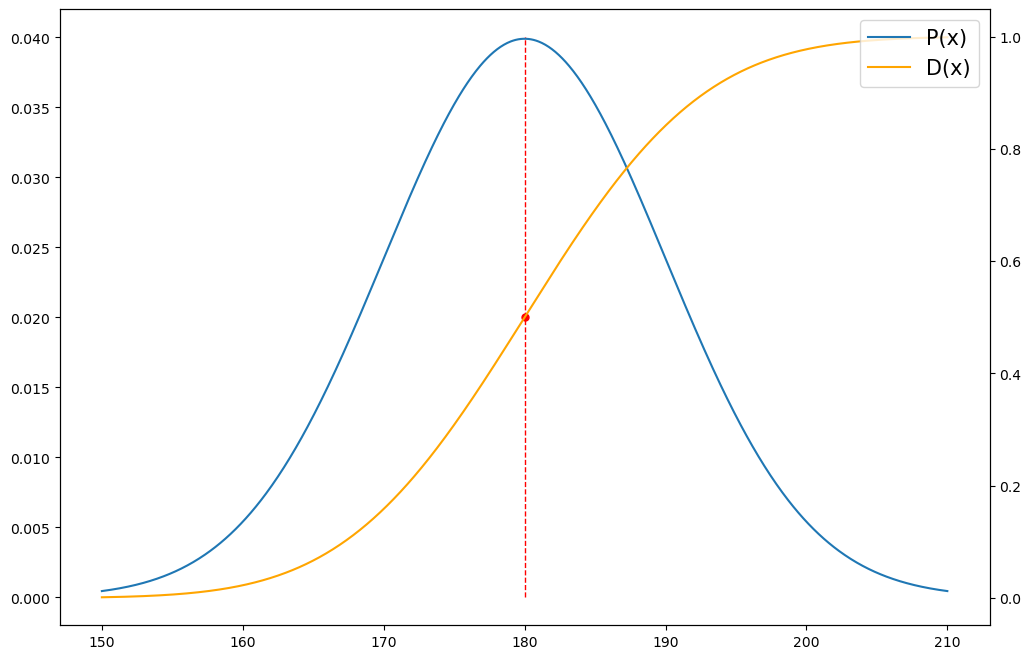

In [190]:
# Define the x-axis values for the PDF and CDF functions
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# There's a challenge here: the y-axis has different scales for PDF and CDF
y1 = norm.pdf(x, mean, std)
y2 = norm.cdf(x, mean, std)

# This issue can be resolved using subplots() and twinx()
# Create a single-cell figure layout
fig, ax_left = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

# Create a secondary y-axis on the right
ax_right = ax_left.twinx()

# Plot the PDF on the x-axis and left y-axis
ax_left.plot(x, y1, label="P(x)")

# Plot the CDF on the x-axis and right y-axis
ax_right.plot(x, y2, color="orange", label="D(x)")

# Draw a vertical line and a point at x = 180
ax_left.vlines(x=180, ymin=0, ymax=0.040, linewidth=1, color="r", linestyles="--")
ax_left.plot(
    180, 0.020, marker="o", markersize=5, markeredgecolor="r", markerfacecolor="r"
)

# Since we have two axes, adding a shared legend takes a bit of work
fig.legend(
    loc="upper right",
    bbox_to_anchor=(1, 1),
    bbox_transform=ax_right.transAxes,
    prop={"size": 15},
)

plt.show()

Let’s start by looking at the cumulative distribution function $D(x)$ (the orange curve).  
In the interval from 150 to 210 cm, this function increases continuously,  
but it increases at **different rates**.  

Up to the point $x = 180$ (called the **inflection point**),  
the growth rate of the function increases; after that, it decreases.

This change is described by the **derivative** of the cumulative distribution function —  
that is, the **probability density function** $P(x)$ (the blue curve).  

In the range from 150 to 180, it increases; then, in the interval from 180 to 210, it continuously decreases.

> 🔶 Thus, the **probability density** describes the **rate of change** of the distribution function.


In [191]:
# Define the mean and standard deviation
mu, sigma = 180, 10

# Set the bounds of the interval: from 190 to infinity
lowerbound = 190
upperbound = np.inf

# The quad() function expects, as its first argument, the function to integrate
# Define a Gaussian function with one parameter


def gauss(x):
    """Return probability density for normal distribution with given mean and std dev."""
    return norm.pdf(x, mu, sigma)


# Pass the Gaussian function along with the lower and upper limits to quad()
# Store the returned integral value in the variable 'integral'
integral = integrate.quad(gauss, lowerbound, upperbound)[0]

# Since we computed the probability of height ≥ 190 cm (area to the right),
# to find the probability of height ≤ 190 cm, subtract the result from 1
1 - integral

0.8413447460685429

## Probability of a Specific Value

This is an important and somewhat counterintuitive point:  
The probability that a random variable from a **continuous distribution** takes on an **exact** value  
(for example, meeting a person of an exact height) is **zero**.  
This is easy to demonstrate.

Earlier, we calculated the probability of meeting a person with height between 170 and 190 cm  
by subtracting the smaller area under the curve from the larger one:

$$
P(170 \le x \le 190) = P(x \le 190) - P(x \le 170) \approx 0.68
$$

But if we try to calculate the probability of meeting a person with **exactly** 190 cm height  
using the same method, it's clearly zero:

$$
P(x = 190) = P(x \le 190) - P(x \le 190) = 0
$$

---

## Sampling

Now let's take a small detour and look at the process of **sampling**.  
It's very straightforward: we take a certain set of elements and randomly select some of them from it.


In [192]:
# Let's take a bag with multicolored balls
bag = [
    "red",
    "yellow",
    "green",
    "gray",
    "black",
    "orange",
    "white",
    "blue",
    "brown",
    "pink",
]

You can form a sample in two ways.

In the first case, we randomly draw an element, but before taking the next one, we put the previous element back.
This process is called sampling with replacement, and it can be simulated using the np.random.choice() function.

In [193]:
np.random.seed(42)

np.random.choice(bag, 8)

array(['white', 'gray', 'blue', 'black', 'white', 'pink', 'green',
       'white'], dtype='<U6')

Note that the white ball appears more than once — this is because we're sampling with replacement.

Alternatively, you can form a sample without replacement.
In this case, once an element is drawn, it is set aside and not returned to the bag before drawing the next one.
To do this using the np.random.choice() function, you need to set the parameter replace=False.

In [194]:
np.random.seed(42)

np.random.choice(bag, 8, replace=False)

array(['brown', 'yellow', 'orange', 'red', 'blue', 'green', 'pink',
       'black'], dtype='<U6')

In [195]:
np.random.seed(42)

# Select 5 numbers from an array ranging from 0 to 9
# Under the hood, the array of 10 numbers is created using np.arange(10)
np.random.choice(10, 5)

array([6, 3, 7, 4, 6], dtype=int32)

## Central Limit Theorem

In addition to processes in the human body and natural phenomena, the normal distribution plays an important role in the **Central Limit Theorem** (CLT).

---

## Definitions and Notation

Let’s first recall some terms and introduce useful notations.

First, remember that data can represent either a **population** or a **sample** taken from it.  
If we take multiple samples from the same population and calculate a certain statistic for each sample  
(for example, the sample mean), then the collection of these sample means forms the  
**sampling distribution**.

When studying the Central Limit Theorem, we are particularly interested in the behavior  
of this sampling distribution — specifically its **mean** and **standard deviation**.

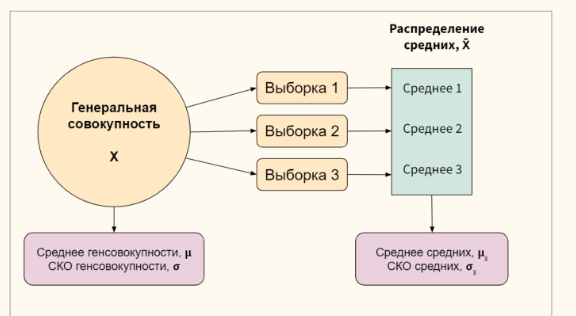


## CLT and the Normal Distribution

We already know that the **mean of sample means** from several samples taken from the same population tends to approach the **true population mean**:

$$
\mu_{\bar{x}} = \mu
$$

> ⚠️ However, there's more:  
> 1) If the samples are drawn randomly, and  
> 2) Each sample contains at least **30 observations**,  
> then the **distribution of the sample means will follow a normal distribution**.

Even if the **original population distribution is not normal**.

At the same time, the **standard deviation** of the sampling distribution of the mean approaches:

$$
\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}}
$$

---

### In mathematical terms:

$$
X \sim \text{dist}(\mu, \sigma) \quad \Rightarrow \quad \bar{X} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{n}}\right)
$$

---

### Let's Verify It in Python

Let’s now test the Central Limit Theorem using Python.

We’ll begin by creating a **right-skewed distribution**.  
This is common in real-world cases like **income distribution**,  
where most values cluster around the average, but a few outliers stretch the distribution to the right.


In [196]:
# Generate an array of synthetic salary data with artificial parameters
salaries = skewnorm.rvs(
    a=20,  # skewness
    loc=20,  # mean (before skewing)
    scale=80,  # spread or standard deviation
    size=100000,  # size of the generated array
    random_state=42,
)  # ensures reproducibility

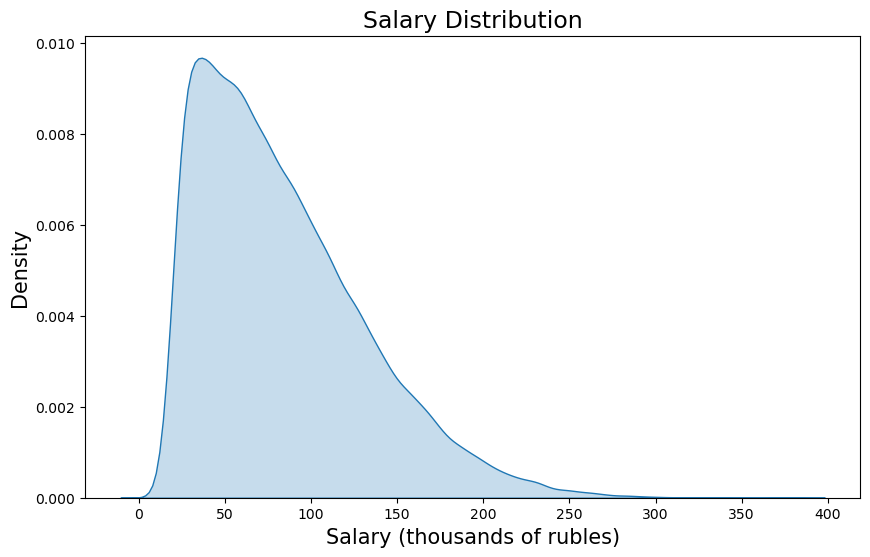

In [197]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate of the salary distribution
sns.kdeplot(salaries, fill=True)

# Add axis labels
plt.xlabel("Salary (thousands of rubles)", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Add a title
plt.title("Salary Distribution", fontsize=17)

plt.show()

Most of the salaries are concentrated near the lower bound of the range,  
while on the right there is a long tail representing the few individuals whose income is significantly above average.

In [198]:
np.mean(salaries)

np.float64(83.84511076271755)

In [199]:
np.median(salaries)

np.float64(74.07573752156253)

As expected, the **median** is lower than the **arithmetic mean**,  
which is influenced by a small number of very high salaries.  

For this reason — as mentioned earlier — the **median** is often preferred when measuring average salary.

Now, let’s calculate the **standard deviation**.


In [200]:
np.std(salaries)

np.float64(48.366511941114176)

## Sampling with Replacement

Now let’s take samples from our skewed population `salaries` and observe what happens  
to the **distribution of sample means**.

We’ll begin by generating the required number of samples.


In [201]:
# Set the random seed for reproducibility
np.random.seed(42)

# Create a list to store the sample means
sample_means = []

# Define the number of samples and the size of each sample
n_samples = 1000
sample_size = 30

# Generate samples in a loop
for i in range(n_samples):

    # Randomly select the required number of elements from the population
    sample = np.random.choice(salaries, sample_size, replace=False)

    # Calculate the mean of the sample and store it in the list
    sample_means.append(np.mean(sample))

# Check that we've generated the correct number of sample means
len(sample_means)

1000

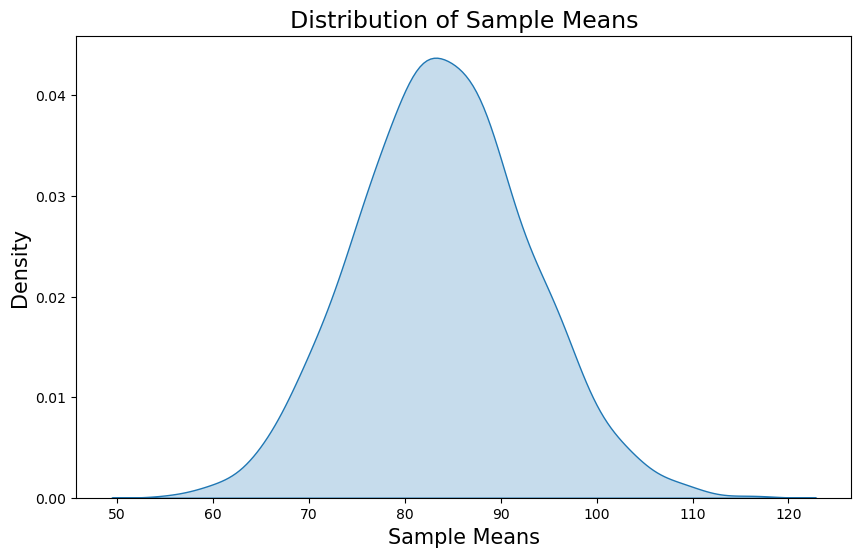

In [202]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the kernel density estimate of the sample means
sns.kdeplot(sample_means, fill=True)

# Add axis labels
plt.xlabel("Sample Means", fontsize=15)
plt.ylabel("Density", fontsize=15)

# Add a title
plt.title("Distribution of Sample Means", fontsize=17)

plt.show()

Notice that the distribution of sample means is **much closer to a normal distribution**  
compared to the original skewed `salaries` distribution.

Now, let’s calculate the values that — according to the **Central Limit Theorem** —  
the **mean** and **standard deviation** of the sample means should approach.


In [203]:
# According to the Central Limit Theorem, let's check what values
# the mean and standard deviation of the sampling distribution should approach
np.mean(salaries), np.std(salaries) / np.sqrt(sample_size)

(np.float64(83.84511076271755), np.float64(8.830476539330403))

**Sampling** Without Replacement


As we can see, the Central Limit Theorem (CLT) holds.

## **Sampling Without Replacement**

Now, as an exercise, let’s observe how the **distribution of sample means** changes  
depending on different numbers and sizes of samples.

This time, we will perform **sampling without replacement**, because —  
if you look closely — despite using the `replace=False` parameter previously,  
we were still sampling from the same population multiple times.  
This meant elements could be repeated across different samples.

> 🔶 **Important**: For the CLT to remain valid when sampling without replacement,  
> the size of a single sample must not exceed **5% of the total population size**.

---

To simulate the distribution of sample means **without replacement**,  
we’ll define a custom function `sample_means()`.  
This function will accept the following parameters:

- `data` — the dataset (i.e., the population);
- `n_samples` — the number of samples;
- `sample_size` — the size of each sample;
- `replace=True` — whether to sample with or without replacement;
- `random_state=None` — random seed for reproducibility.


In [204]:
def sample_means(data, n_samples, sample_size, replace=True, random_state=None):
    """Generate distribution of sample means by sampling from data with/without replacement."""
    # create a list to store the sample means
    sample_means = []

    # set the random seed for reproducibility
    np.random.seed(random_state)

    # generate samples in a loop
    for i in range(n_samples):

        # by selecting the required number of elements from the population
        sample = np.random.choice(data, sample_size, replace=False)

        # calculate the mean value for each sample and add it to the list of sample means
        sample_means.append(np.mean(sample))

        # if it is specified that sampling is without replacement
        if replace == False:

            # remove this sample from the dataset (e.g., salary data)
            data = np.array(list(set(data) - set(sample)))

    # return the list of sample means
    return sample_means

In [205]:
# generate 100 samples without replacement, each containing 30 elements
res = sample_means(salaries, 100, 30, replace=False, random_state=42)

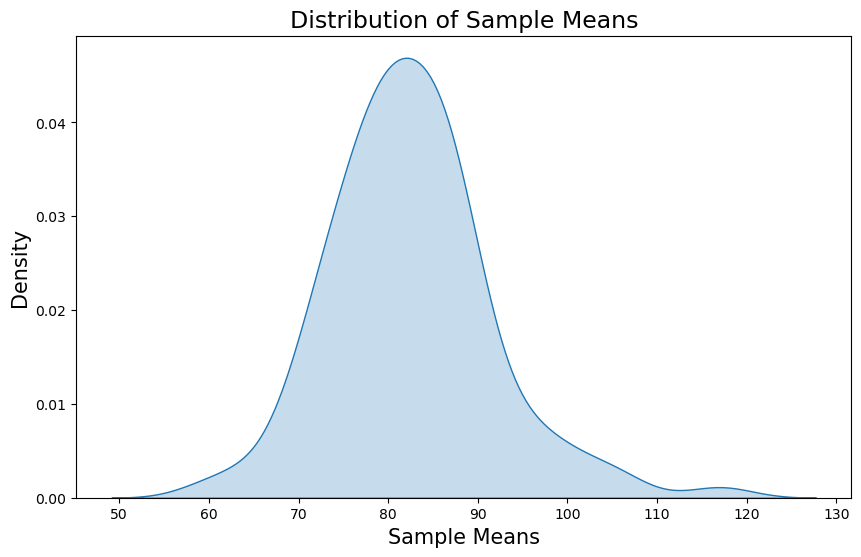

In [206]:
# set the size of the plot
plt.figure(figsize=(10, 6))

# plot the kernel density estimate (KDE)
sns.kdeplot(res, fill=True)

# add labels
plt.xlabel("Sample Means", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title("Distribution of Sample Means", fontsize=17)

plt.show()

Distribution of Sample Means for Different Numbers and Sizes of Samples

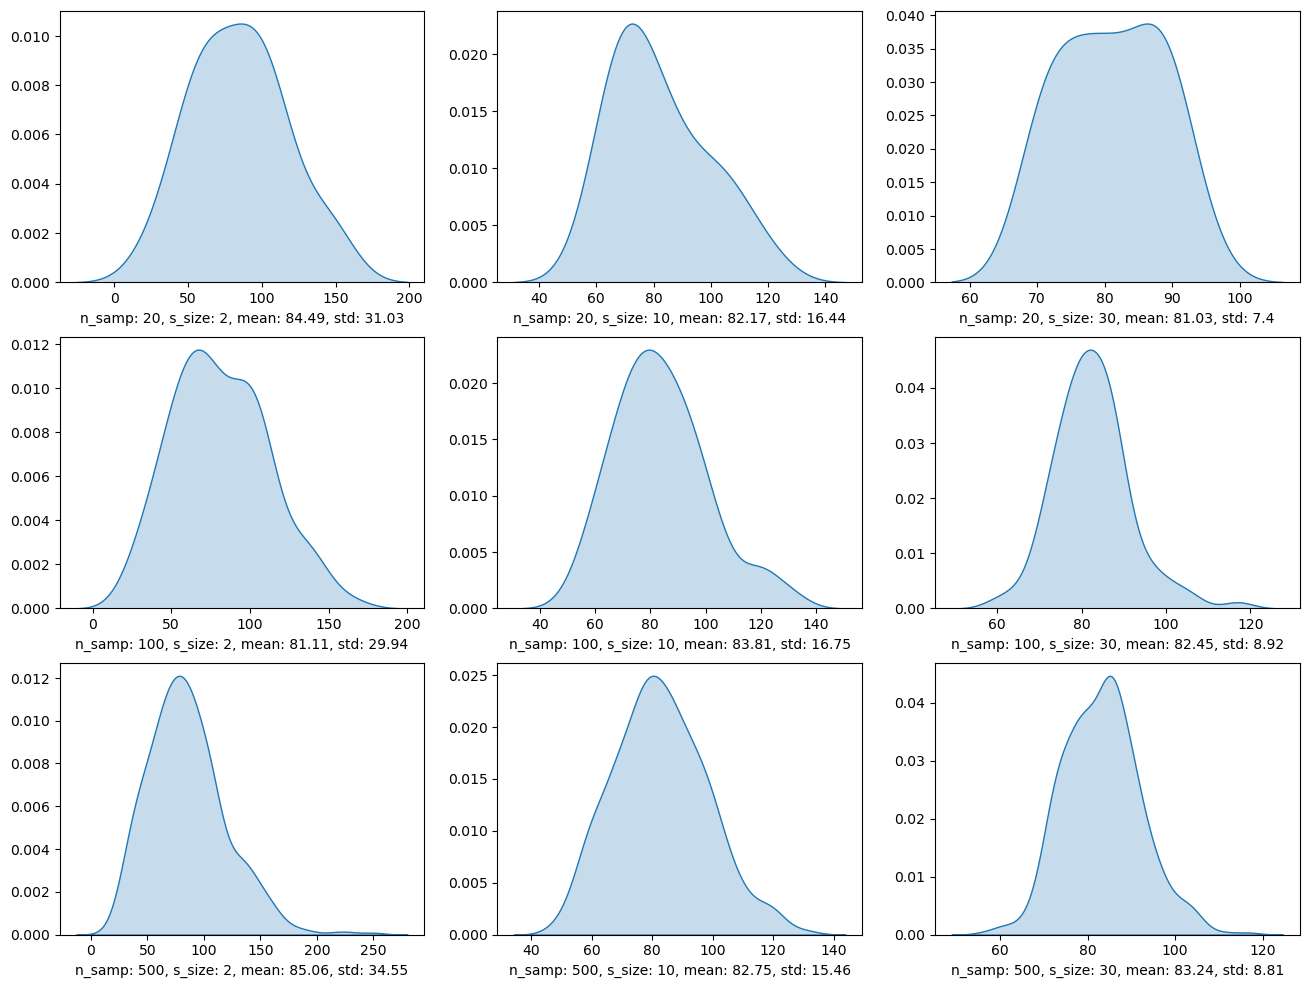

In [207]:
# create a 3 x 3 grid of subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))

# list of different numbers of samples
number_of_samples_list = [20, 100, 500]
# and list of different sample sizes
sample_size_list = [2, 10, 30]

# also, create lists to store the resulting
# mean values
mean_list = []
# and standard deviations
std_list = []

# for the rows of the 3 x 3 grid, use different numbers of samples
for i, n_samples in enumerate(number_of_samples_list):
    # for the columns, use different sample sizes
    for j, sample_size in enumerate(sample_size_list):

        # on each iteration, generate a "fresh" population
        salaries = skewnorm.rvs(a=20, loc=20, scale=80, size=100000, random_state=42)

        # and create a distribution with the given parameters
        res = sample_means(
            salaries, n_samples, sample_size, replace=False, random_state=42
        )

        # also, calculate the mean and standard deviation
        mean = np.mean(res).round(2)
        std = np.std(res).round(2)

        # and append them to the respective lists
        mean_list.append(mean)
        std_list.append(std)

        # plot the KDE in the subplot at coordinates [i, j]
        sns.kdeplot(res, fill=True, ax=ax[i, j])
        # and set the x-axis label to include number of samples, sample size, mean, and std
        ax[i, j].set_xlabel(
            "n_samp: {}, s_size: {}, mean: {}, std: {}".format(
                n_samples, sample_size, mean, std
            )
        )
        # leave the y-axis label empty
        ax[i, j].set_ylabel("")

# show the final result
plt.show()

In [208]:
# generate the population again
salaries = skewnorm.rvs(a=20, loc=20, scale=80, size=100000, random_state=42)

# store data in the dictionary sampling_distributions
sampling_distributions = {
    # number of samples in each of the nine distributions
    "Number_of_samples": np.repeat(number_of_samples_list, 3),
    # sample size for each sample
    "Sample_size": sample_size_list * 3,
    # population mean
    "Pop_mean": [np.mean(salaries)] * 9,
    # actual mean of each sampling distribution
    "Actual_mean": mean_list,
    # expected standard deviation (according to CLT)
    "Expected_std": [np.std(salaries) / np.sqrt(n) for n in sample_size_list * 3],
    # actual standard deviation of each sampling distribution
    "Actual_std": std_list,
}

# convert the dictionary to a DataFrame and round the values
pd.DataFrame(sampling_distributions).round(2).astype(str)

,Number_of_samples,Sample_size,Pop_mean,Actual_mean,Expected_std,Actual_std
0,20,2,83.85,84.49,34.2,31.03
1,20,10,83.85,82.17,15.29,16.44
2,20,30,83.85,81.03,8.83,7.4
3,100,2,83.85,81.11,34.2,29.94
4,100,10,83.85,83.81,15.29,16.75
5,100,30,83.85,82.45,8.83,8.92
6,500,2,83.85,85.06,34.2,34.55
7,500,10,83.85,82.75,15.29,15.46
8,500,30,83.85,83.24,8.83,8.81


### Standard Normal Distribution

Any normal distribution with a mean $\mu$ and standard deviation $\sigma$ can be converted to a **standard normal distribution** (with mean 0 and standard deviation 1):

$$
Z \sim \mathcal{N}(0, 1)
$$

To do this, we use the following formula:

$$
z = \frac{x - \mu}{\sigma}
$$

This way, we convert each value $x$ to its corresponding **z-score** by subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.

For example, we can convert data on male height to standard form (using **vectorization** and **code translation**).


In [209]:
# use vectorization and code translation
# to convert the distribution to standard form
height_men_standard = (height_men - np.mean(height_men)) / np.std(height_men)
height_men_standard[:10]

array([ 0.49836188, -0.10076518,  0.59821639,  1.49690697, -0.20061969,
       -0.20061969,  1.59676148,  0.7979254 , -0.50018322,  0.49836188])

It’s worth mentioning that the exact same result can be achieved by using the .fit_transform() method of the StandardScaler class from the preprocessing module in the sklearn library.

In [210]:
# create an instance of this class
scaler = StandardScaler()

# apply the .fit_transform() method to the height data,
# first converting it into a 2D array
scaled_height_men = scaler.fit_transform(height_men.reshape(-1, 1))

# flatten the result back to a 1D array
scaled_height_men = scaled_height_men.flatten()

# compare the result with the previously standardized data
np.array_equiv(height_men_standard, scaled_height_men)

True

In [211]:
# directly create a standard normal distribution
st_norm = np.random.standard_normal(10000)
st_norm[:10]

array([-0.76366945, -1.11864174, -0.77088274,  0.96929238, -0.69869956,
       -1.34853749, -0.94994848,  0.99902749,  0.30575659, -0.45619504])

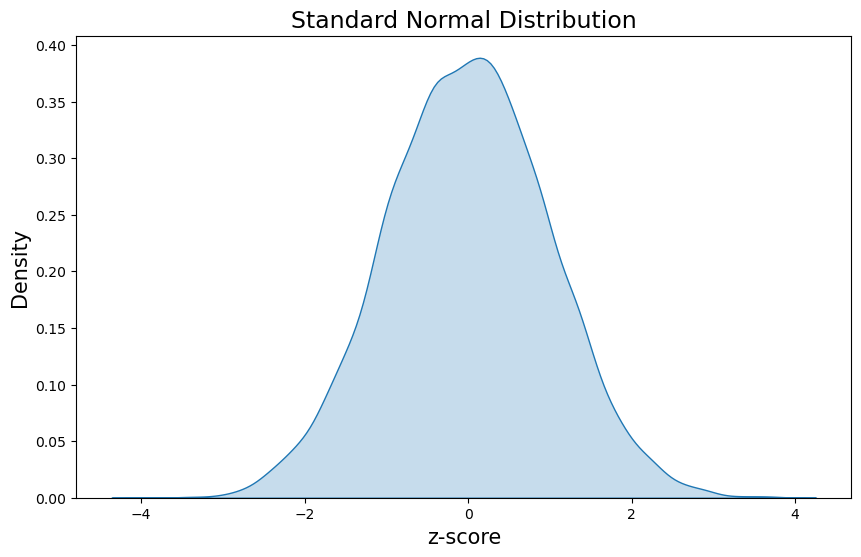

In [212]:
# set the size of the plot
plt.figure(figsize=(10, 6))

# plot the density
sns.kdeplot(st_norm, fill=True)

# add labels
plt.xlabel("z-score", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title("Standard Normal Distribution", fontsize=17)


plt.show()

In [213]:
# the generated array can be multi-dimensional
np.random.standard_normal((2, 3))

array([[-0.40187015, -0.0797878 , -0.21066058],
       [-0.70034594,  0.10488661,  0.85464581]])

In [214]:
# calculate the z-score corresponding to 95% of the area under the curve
# loc = 0, scale = 1 are default parameters and can be omitted
zscore = norm.ppf(0.95)
zscore

np.float64(1.6448536269514722)

In [215]:
# убедиться в верности результата можно с помощью функции распределения
norm.cdf(zscore)

np.float64(0.95)

### Criteria for Normality of a Distribution

Let’s once again look at the distribution of sample means. We’ve said that under certain conditions, it tends to approach normality.

So far, we've been evaluating the normality of a distribution *"by eye"* (using histograms, density plots, or boxplots), but in some cases it's helpful to have a more reliable criterion for normality. This is important, for example, when evaluating:

- the distribution of residuals in a linear regression model;
- the distribution of observations within classes in a linear discriminant analysis (LDA) model.

Let’s look at two ways to assess the normality of a distribution.

---

### Method 1. Normal Probability Plot

A **normal probability plot** shows the relationship between the ordered data and the corresponding quantiles of a normal distribution.

> **If the data is normally distributed**, all the points will lie along a straight line.  
> **If not**, we will observe deviations.


### Algorithm for Creating a Normal Probability Plot

1. Sort the original data in ascending order;
2. Compute the cumulative probability (cumulative probability) of each value;
3. Use the quantile function to find which quantile corresponds to that probability, assuming the distribution is normal;
4. Plot the quantiles on the **x-axis**, and the sorted data on the **y-axis**.

---

The cumulative probability is calculated using the formula:

$$
P = \frac{i - 0.375}{n + 0.25}
$$

Where:  
- $i$ is the index (starting from 1) of the value in the sorted list  
- $n$ is the total number of observations

---

We'll now use Python to create a normal probability plot for the height data.


In [216]:
# first, sort the height data
height_men_srt = sorted(height_men)

# calculate the length of the array
n = len(height_men_srt)

# compute cumulative probabilities
cum_probability = [(i - 0.375) / (n + 0.25) for i in range(1, n + 1)]

# calculate the quantiles as if the data were normally distributed
quantiles = norm.ppf(cum_probability)

In [217]:
# as expected, the cumulative probability ranges from 0 to 1
cum_probability[0], cum_probability[-1]

(6.249984375039063e-06, 0.999993750015625)

In [218]:
# let's also take a look at the corresponding extreme quantiles
quantiles[0], quantiles[-1]

(np.float64(-4.368680139037586), np.float64(4.368680139037566))

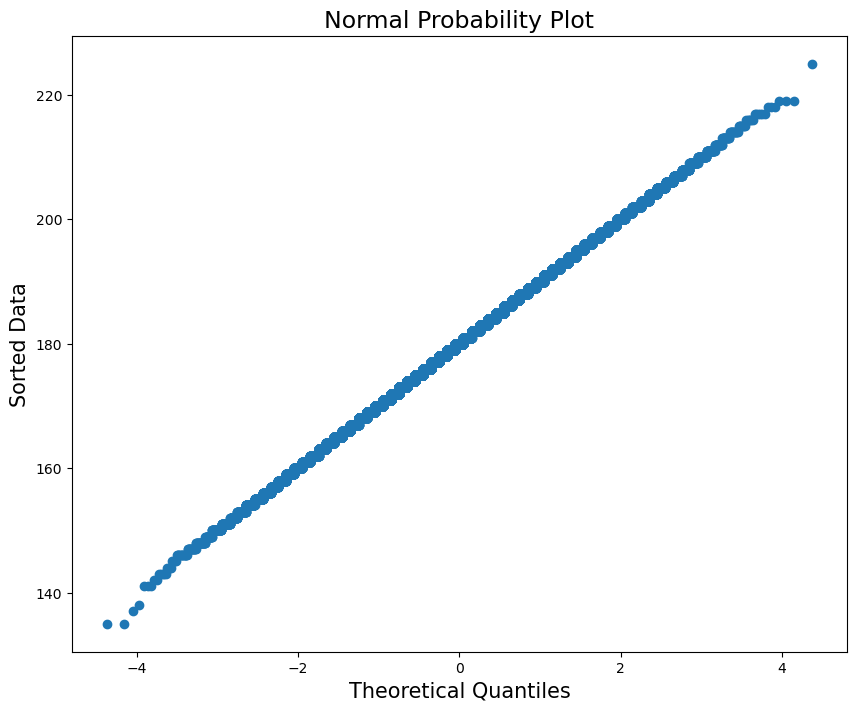

In [219]:
# set the size of the plot
plt.figure(figsize=(10, 8))

# create a scatter plot: x-axis for theoretical quantiles,
# y-axis for the sorted observed data
plt.scatter(quantiles, height_men_srt)

# add labels
plt.xlabel("Theoretical Quantiles", fontsize=15)
plt.ylabel("Sorted Data", fontsize=15)
plt.title("Normal Probability Plot", fontsize=17)

plt.show()

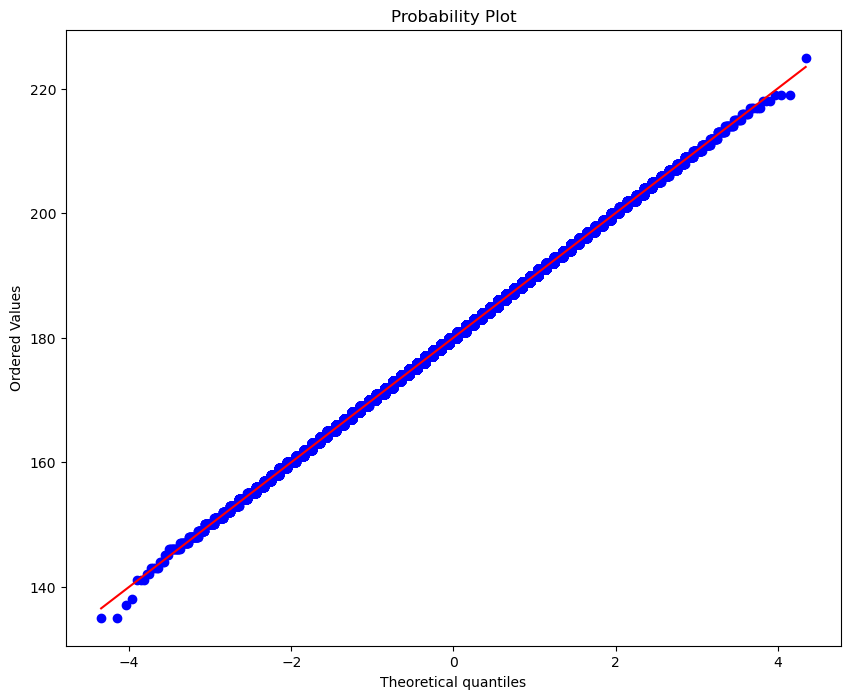

In [221]:
plt.figure(figsize=(10, 8))

# the parameter dist='norm' specifies comparison against a normal distribution
# plot=plt uses matplotlib.pyplot to draw the plot
probplot(height_men, dist="norm", plot=plt)

plt.show()

In [222]:
# the probplot() function with parameters plot=None and fit=False returns two arrays:
# the quantiles and the sorted data; we take the first array [0]
quantiles = probplot(height_men, dist="norm", plot=None, fit=False)[0]

# check the first and last values
quantiles[0], quantiles[-1]

(np.float64(-4.346021549886044), np.float64(4.346021549886044))

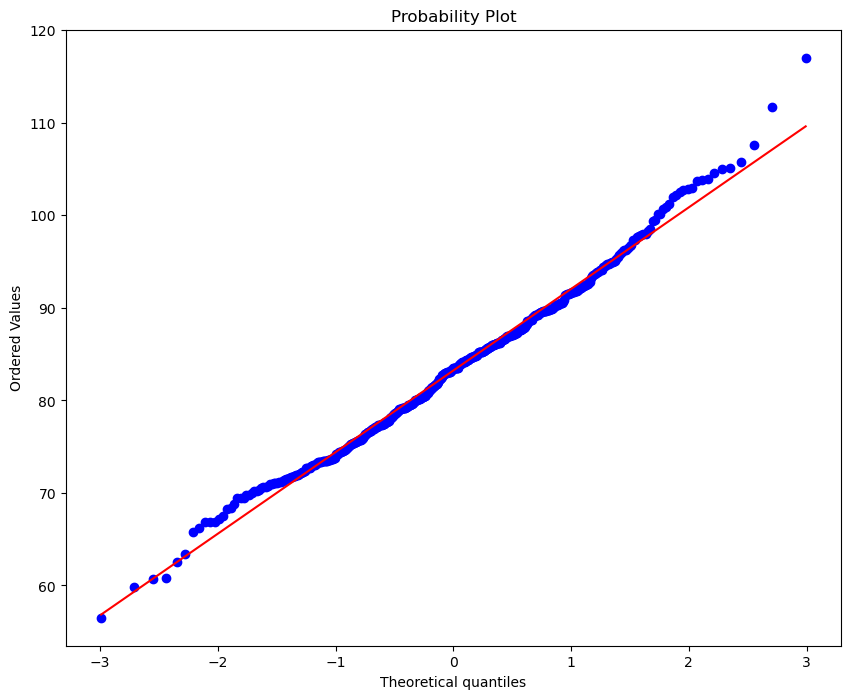

In [223]:
# use the sample_means() function again with parameters n_samples=500, sample_size=30
sampling_dist = sample_means(salaries, 500, 30, replace=False, random_state=42)

# plot the normal probability plot
plt.figure(figsize=(10, 8))
probplot(sampling_dist, dist="norm", plot=plt)
plt.show()

### Shapiro-Wilk test

### Method 2. Shapiro–Wilk Test

The **Shapiro–Wilk test** allows you to make a **statistically significant conclusion** about the normality of a distribution:

- The **null hypothesis** assumes the distribution is normal;
- The **alternative hypothesis** claims otherwise.

> ⚠️ The Shapiro–Wilk test is sensitive to the number of elements ($N$) in the dataset and **loses accuracy when $N > 5000$**.

We’ll perform the test for the distributions of **height** and **salary** using a significance level of **0.05**, but first we’ll create distributions with a smaller number of elements.


In [224]:
# generate new height and salary data with a smaller number of elements
np.random.seed(42)
height_men = np.round(np.random.normal(180, 10, 1000))

salaries = skewnorm.rvs(a=20, loc=20, scale=80, size=1000, random_state=42)

In [225]:
# perform the Shapiro–Wilk test for normality on the height data
_, p_value = shapiro(height_men)
p_value

np.float64(0.1703964914387503)

In [226]:
# perform the Shapiro–Wilk test for normality on the salary data
_, p_value = shapiro(salaries)
p_value

np.float64(1.372730915261255e-21)

# Normal Approximation to the Binomial Distribution

## De Moivre–Laplace Theorem

**De Moivre–Laplace Theorem** (a special case of the Central Limit Theorem) states that under certain conditions, the normal distribution can be used as an approximation to the binomial distribution.

Let’s recall the formula for the binomial distribution:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

where  
- $n$ is the number of trials,  
- $k$ is the number of successes,  
- $p$ is the probability of success.

If both conditions  
$$
np \geq 5 \quad \text{and} \quad n(1 - p) \geq 5
$$  
are satisfied, then the following holds:

$$
B(n, p) \sim \mathcal{N}(np, \sqrt{np(1 - p)})
$$

> In other words, if the probability of success $p$ is close to 0.5, or if the number of trials $n$ is sufficiently large, the binomial distribution will approximate the normal distribution as $n


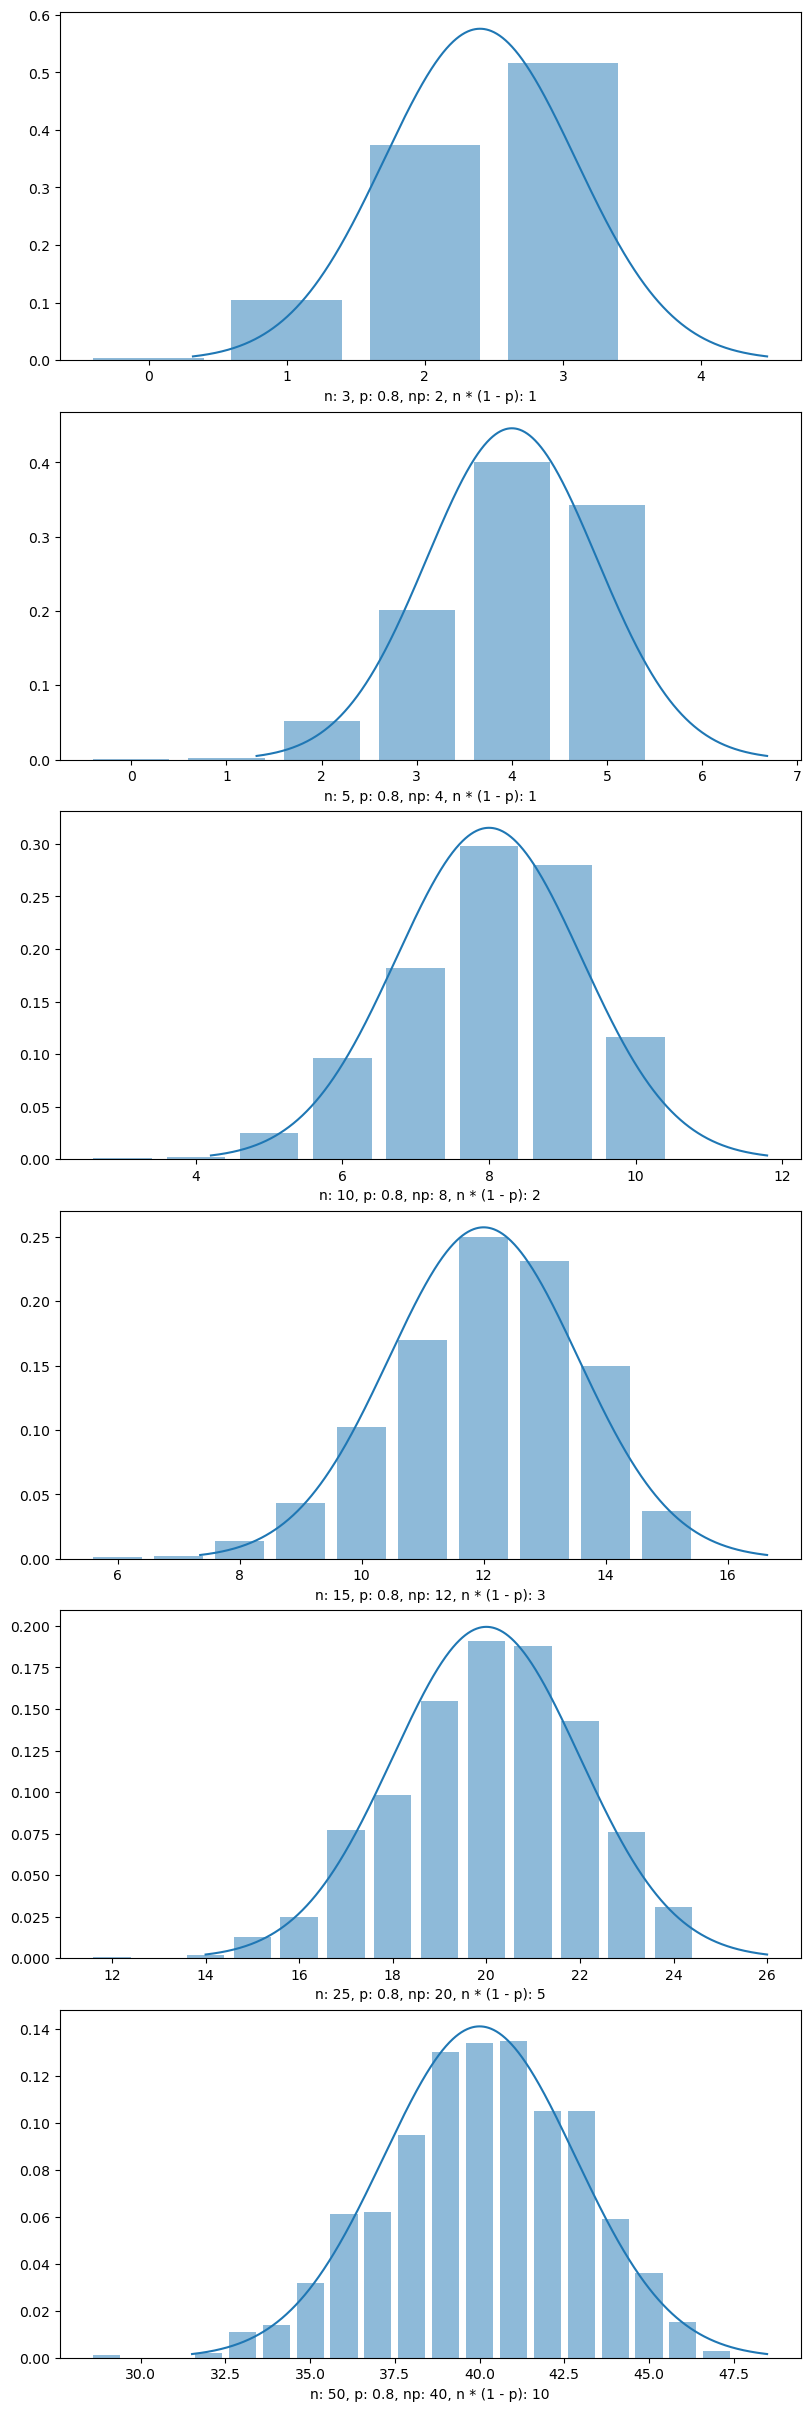

In [227]:
# create a list with the number of trials (coin tosses)
n_list = [3, 5, 10, 15, 25, 50]

# subplots will be arranged in one column with the number of rows
# equal to the length of the n_list
fig, ax = plt.subplots(
    nrows=len(n_list),
    ncols=1,
    # the figure size will also depend on the length of n_list
    figsize=(8, 4 * len(n_list)),
    # constrained_layout adjusts spacing between subplots
    constrained_layout=True,
)

# iterate over the n_list
for i, n in enumerate(n_list):

    # set the probability of success
    p = 0.8
    # check if the conditions are satisfied for the given p and n
    cond1, cond2 = n * p, n * (1 - p)

    # generate a binomial distribution with the given p and n
    np.random.seed(42)
    res = np.random.binomial(n=n, p=p, size=1000)
    # record the number of successful outcomes and their frequencies
    successes, counts = np.unique(res, return_counts=True)

    # use a bar chart to show the relative frequency of each random variable value
    ax[i].bar(successes, counts / len(res), alpha=0.5)
    # label the chart with n, p, and the result of the condition checks
    ax[i].set_xlabel(
        "n: {}, p: {}, np: {}, n * (1 - p): {}".format(n, p, round(cond1), round(cond2))
    )

    # calculate the mean and standard deviation according to the De Moivre–Laplace theorem
    mean, std = n * p, np.sqrt(n * p * (1 - p))
    # generate 1000 points within +/- 3 standard deviations from the mean
    x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)
    # find the corresponding y-values using the Gaussian formula
    f_norm = norm.pdf(x, mean, std)
    # plot the normal distribution density curve
    ax[i].plot(x, f_norm)

    # optionally, you can also plot the "ideal" binomial distribution using the binom() function
    # from scipy.stats import binom
    # x2 = np.arange(n)
    # binom_p = binom.pmf(x2, n, p)
    # ax[i].stem(x2, binom_p, use_line_collection = True)

plt.show()

As we can see, initially (for example, when $n = 3$), the distribution was expected to be skewed, but as the number of trials increases, it starts to "fit" better into the graph of the normal distribution.

### Adjustment for Discontinuity in Distribution

The normal approximation to the binomial distribution is convenient when we need to calculate the probability of a large number of outcomes. However, we need to make one adjustment.

In the graph below, it is evident that to calculate the binomial probability, we need to sum the areas of the histogram bars. For example, to find the probability of getting no more than one head in three consecutive coin tosses, we need to sum the first and second bars.

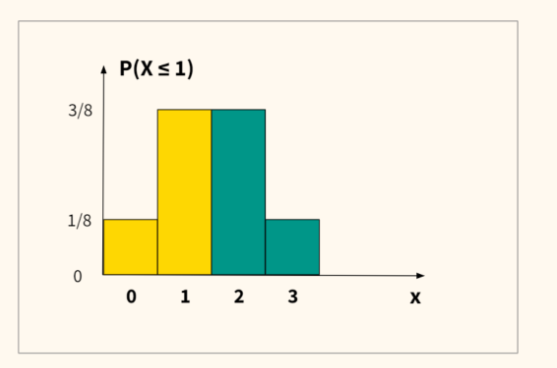

We get:

$P_B(X \leq 1) = P_B(X = 0) + P_B(X = 1) = \frac{1}{8} + \frac{3}{8} = \frac{4}{8} = \frac{1}{2}$

At the same time, if we want to calculate this area using a normal distribution curve, we need to shift the boundary in such a way as to capture all the bars of interest. In this case, we add 0.5. That is, $P_N(X < 1.5)$.

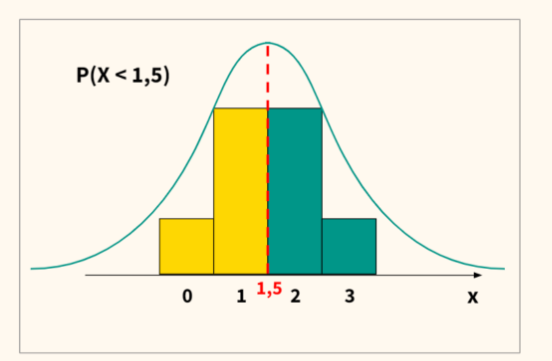


We use the Muwara-Laplace theorem to calculate the mean and standard deviation (let $n = 3, p = 0.5$).

$\mu = np = 3 \times 0.5 = 1.5$

$\sigma = \sqrt{np(1 - p)} = \sqrt{3 \times 0.5 \times 0.5} = 0.75$

The next step is to use Python to find the area under the normal distribution curve.


$$ B(3; 0,5) \sim N(1,5; 0,75) $$

$$ P_B(X \leq 1) \sim P_N(X < 1,5) $$

In [228]:
# We pass the boundary, mean (loc), and standard deviation (scale) to the .cdf() method
area = norm.cdf(1.5, loc=1.5, scale=0.75)

# The output will be the area under the curve
area

np.float64(0.5)

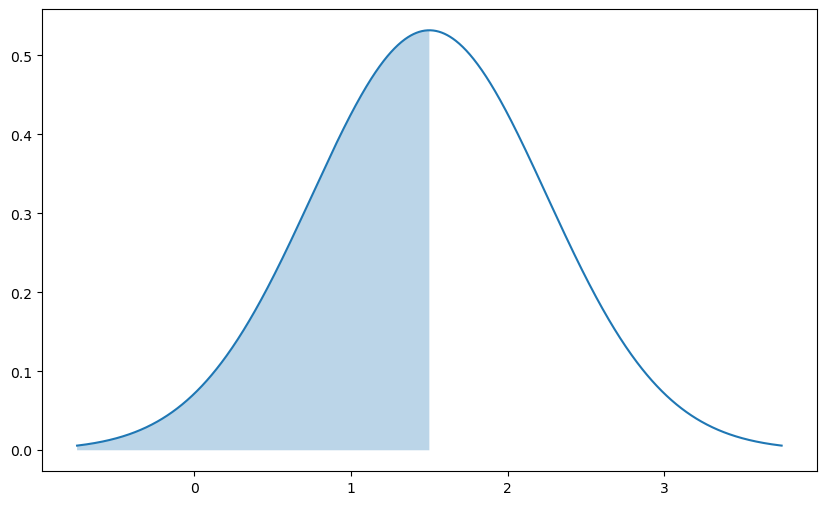

In [229]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Define the mean and standard deviation
mean, std = 1.5, 0.75

# Create a space of 1000 points in the range +/- three standard deviations from the mean
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# Calculate the values for the y-axis using the .pdf() method
# i.e., the probability density function
f = norm.pdf(x, mean, std)

# Plot the graph
plt.plot(x, f)

# Additionally, create points on the x-axis for the shaded area
px = np.linspace(mean - 3 * std, mean, 1000)

# Fill the space under the normal distribution curve to the y = 0 axis for these points
plt.fill_between(px, norm.pdf(px, mean, std), alpha=0.3)

# Display the plot
plt.show()

If we are asked to find the probability of a specific value, for example, the occurrence of two eagles $P_B(X = 2)$ (i.e., the area of one histogram bar), then when calculating the area under the normal distribution curve, an interval $P_N(1.5 < X < 2.5)$ is required. In other words, we add 0.5 from both sides.


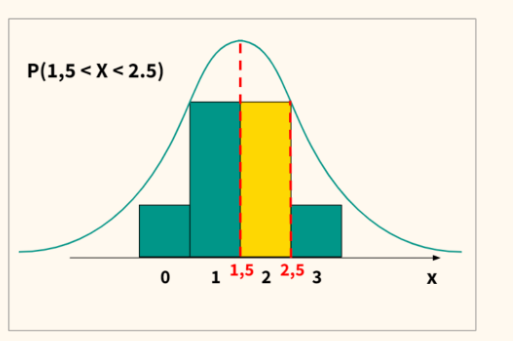

$$ P_B(X = 2) \sim P_N(1,5 < X < 2,5) $$

In [230]:
# We will pass the boundary, mean (loc), and standard deviation (scale) to the .cdf() method
area = norm.cdf(2.5, loc=1.5, scale=0.75) - norm.cdf(1.5, loc=1.5, scale=0.75)

# As a result, we will get the area under the curve
area

np.float64(0.4087887802741321)

Let me remind you that the area of the column is $P_B(X = 2) = \frac{3}{8} = 0.375$, which differs significantly from the area under the curve. This is because we took a too small $n$, and the conditions $np \geq 5$ and $n(1 - p) \geq 5$ are not satisfied in this case.

As $n$ increases, the continuity correction for the distribution becomes less significant.

In [231]:
# Calculate the binomial probability P(X = 2)
3 / 8

0.375

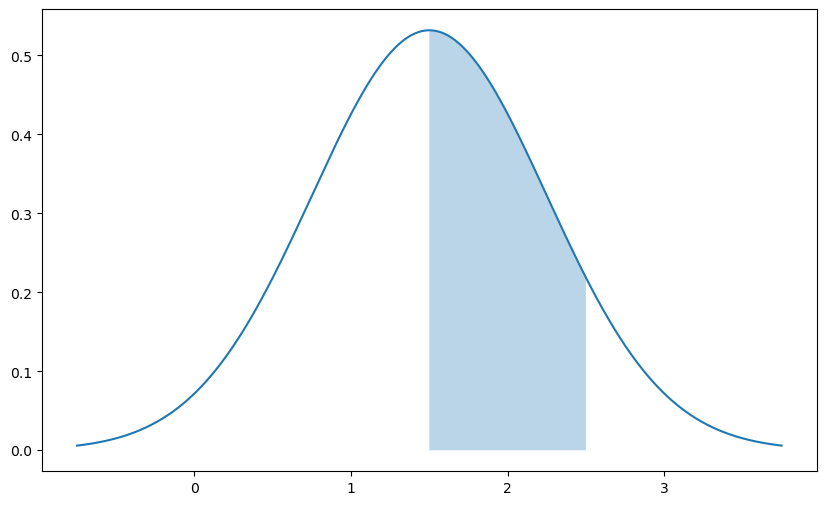

In [232]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Define mean and standard deviation
mean, std = 1.5, 0.75

# Create an array of 1000 points within ±3 standard deviations from the mean
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# Calculate y-values using the probability density function (PDF)
f = norm.pdf(x, mean, std)

# Plot the normal distribution curve
plt.plot(x, f)

# Create points for the shaded area on the x-axis
px = np.linspace(1.5, 2.5, 1000)

# Fill the area between the normal curve and y=0 within the specified x-range
plt.fill_between(px, norm.pdf(px, mean, std), alpha=0.3)

# Display both plots
plt.show()

# Approximation Example

To reinforce the learned material, let's consider a more practical example. Suppose you've received a batch of 500 equipment units. It's known that on average, $2\%$ (i.e., $0.02$) of the equipment has various defects. What is the probability that the batch contains at least 15 defective units?

We're dealing with binomial distribution here, since we're sequentially taking equipment units from the batch, and each one either has a defect or doesn't.

$B(n, p) = B(500, 0.02) \rightarrow P_B(X \geq 15)$

$$ B(n, p) = B(500; 0,02) \rightarrow P_B(X \geq 15) $$

In [233]:
# Set the parameters of the binomial distribution
# $n = 500$, $p = 0.02$ (2% defect rate)
n, p = 500, 0.02

# The .cdf() method calculates the probability up to and including the given value,
# so to find $P(X \geq 15)$ we:
# 1. Calculate $P(X \leq 14)$
# 2. Subtract this from 1 to get $P(X \geq 15)$
prob_at_least_15_defective = 1 - binom.cdf(14, n, p)

# This gives the probability of having 15 or more defective units in the batch

Now let's solve this problem using normal approximation. According to the De Moivre-Laplace theorem, we derive:

$B(500, 0.02) \sim \mathcal{N}(\mu = 10, \sigma = \sqrt{9.8}) \rightarrow P_N(X > 14.5)$

Thus, the problem reduces to finding the area under the normal curve with continuity correction applied $(15 - 0.5 = 14.5)$.

$$ B(500; 0,02) \sim {\mathcal N}(10; \sqrt{9.8}) \rightarrow P_N(X > 14,5) $$

In [234]:
# Calculate mean and standard deviation of the binomial distribution
mean, std = n * p, np.sqrt(n * p * (1 - p))

# Calculate the probability using normal approximation with continuity correction
prob_at_least_15 = 1 - norm.cdf(14.5, loc=mean, scale=std)

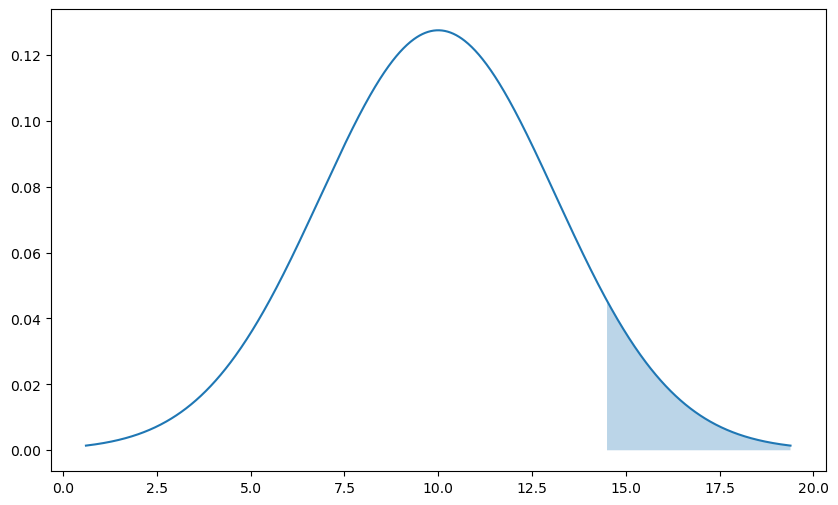

In [235]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Create 1000 points within ±3 standard deviations from the mean
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)

# Calculate y-values using Gaussian (normal) PDF formula
f_norm = norm.pdf(x, loc=mean, scale=std)

# Plot the normal distribution density curve
plt.plot(x, f_norm)

# Create x-points for the shaded area (right tail)
# Starting from continuity-corrected value 14.5 up to μ+3σ
px = np.linspace(14.5, mean + 3 * std, 1000)

# Fill the area under the curve representing P(X ≥ 15)
# Using the normal approximation with continuity correction (14.5)
plt.fill_between(px, norm.pdf(px, mean, std), alpha=0.3)

# Display the plot with the shaded probability area
plt.show()

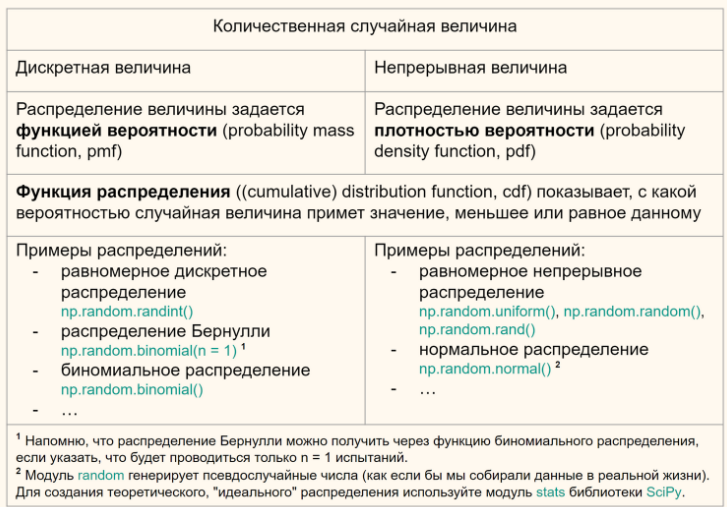

### Combinatorics in Python



In [236]:
# Create an array and pass it to np.random.shuffle()
arr = np.array([1, 2, 3, 4, 5])

# The function returns None, but modifies the original array in-place
print(np.random.shuffle(arr), arr)

None [1 5 3 2 4]


In [237]:
# Create an array again
arr = np.array([1, 2, 3, 4, 5])

# When we pass it to np.random.permutation(),
# we get a shuffled copy while the original array remains unchanged
print(np.random.permutation(arr), arr)

[2 4 3 1 5] [1 2 3 4 5]


### Function for splitting into training and test sets



In [238]:
def split_data(X, y, test_size=0.3, random_state=None):
    """Split input data X and target y into random train and test sets."""
    # Check if X is a Numpy array using isinstance()
    if isinstance(X, np.ndarray):
        # If yes, convert to dataframe
        X = pd.DataFrame(X)
    # Do the same for y
    if isinstance(y, np.ndarray):
        y = pd.DataFrame(y)

    # Alternative way to perform this check:
    # if type(X).__module__ == np.__name__:
    #     X = pd.DataFrame(X)
    # if type(y).__module__ == np.__name__:
    #     y = pd.DataFrame(y)

    # Set the random seed
    np.random.seed(random_state)

    # Shuffle the dataset row indices without modifying the original array
    indices = np.random.permutation(len(X))

    # Determine how many rows will be in the test set
    # by multiplying the number of rows in X by the test set proportion
    data_test_size = int(X.shape[0] * test_size)

    # From this boundary onward will be the training set
    train_indices = indices[data_test_size:]
    # Before this boundary will be the test set
    test_indices = indices[:data_test_size]

    # Using .iloc() method, find all rows in X
    # corresponding to indices in train_indices and test_indices
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]

    # Do the same for y
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    # Return the sets in the same order as sklearn's output
    return X_train, X_test, y_train, y_test

In [239]:
# Load the data into a variable
data = load_diabetes()

# Create two dataframes
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["target"])

# To test the function, you could also create Numpy arrays instead:
# X = data.data
# y = data.target

In [240]:
X_train, X_test, y_train, y_test = split_data(X, y, random_state=42)

In [241]:
X_train.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
108,0.019913,0.050680,0.045529,0.029894,-0.062111,-0.055802,-0.072854,0.026929,0.045604,0.040343
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907


In [242]:
y_train.head(3)

,target
108,232.0
225,208.0
412,261.0


# itertools module  
## Permutations  
### Permutations without replacement  
### Permutations without repetition  

In [243]:
math.factorial(3)

6

In [244]:
x = "ABC"
list(itertools.permutations(x))

[('A', 'B', 'C'),
 ('A', 'C', 'B'),
 ('B', 'A', 'C'),
 ('B', 'C', 'A'),
 ('C', 'A', 'B'),
 ('C', 'B', 'A')]

In [245]:
len(list(itertools.permutations(x)))

6

In [246]:
# Now the original set has six elements
x = "ABCDEF"

# To find out how many ways we can arrange them in three positions,
# we'll pass the parameter r=3 and display the first five elements
list(itertools.permutations(x, r=3))[:5]

[('A', 'B', 'C'),
 ('A', 'B', 'D'),
 ('A', 'B', 'E'),
 ('A', 'B', 'F'),
 ('A', 'C', 'B')]

In [247]:
len(list(itertools.permutations(x, r=3)))

120

### Permutations with repetition  

In [248]:
def permutations_w_repetition(x, r=len(x)):
    """Calculate number of permutations with repetition for given input sequence."""
    # If input is a string,
    if isinstance(x, str):
        # convert it to a list
        x = list(x)

    # Calculate numerator: number of permutations without repetition
    numerator = len(list(itertools.permutations(x, r=r)))

    # To calculate denominator, find how many times each element repeats
    _, counts = np.unique(x, return_counts=True)

    # Initialize denominator variable
    denominator = 1

    # Multiply by factorials of repeating elements
    for c in counts:

        # Check if element repeats
        if c > 1:

            # If yes, multiply denominator by factorial of repeating count
            denominator *= math.factorial(c)

    # Divide numerator by denominator
    # Division gives float, so use int() to return whole number
    return int(numerator / denominator)

In [ ]:
# Create a string with the word "молоко" (meaning "milk" in English)
x = "МОЛОКО"

# Call the function
permutations_w_repetition(x)

120

### Permutations with replacement  

In [250]:
# Let's see how many ways we can choose two ice cream flavors
list(itertools.product(["Vanilla", "Strawberry"], repeat=2))

[('Vanilla', 'Vanilla'),
 ('Vanilla', 'Strawberry'),
 ('Strawberry', 'Vanilla'),
 ('Strawberry', 'Strawberry')]

In [251]:
# Let's look at the ways to permute with replacement two elements out of four
list(itertools.product("ABCD", repeat=2))

[('A', 'A'),
 ('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('B', 'A'),
 ('B', 'B'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'C'),
 ('C', 'D'),
 ('D', 'A'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'D')]

In [252]:
len(list(itertools.product("ABCD", repeat=2)))

16

## Combinations

In [253]:
# Take five elements
x = "ABCDE"

# Find all ways to permute two elements out of these five
list(itertools.permutations(x, r=2))

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('B', 'A'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'A'),
 ('C', 'B'),
 ('C', 'D'),
 ('C', 'E'),
 ('D', 'A'),
 ('D', 'B'),
 ('D', 'C'),
 ('D', 'E'),
 ('E', 'A'),
 ('E', 'B'),
 ('E', 'C'),
 ('E', 'D')]

In [254]:
int(len(list(itertools.permutations(x, r=2))) / math.factorial(2))

10

In [255]:
list(itertools.combinations(x, 2))

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('B', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'D'),
 ('C', 'E'),
 ('D', 'E')]

In [256]:
len(list(itertools.combinations(x, 2)))

10

### Combinations with replacement


In [257]:
list(itertools.combinations_with_replacement("AB", 2))

[('A', 'A'), ('A', 'B'), ('B', 'B')]

In [258]:
list(itertools.combinations("AB", 2))

[('A', 'B')]

## Binomial Coefficients


In [259]:
# A probability tree can be built using Cartesian power
list(itertools.product("HT", repeat=3))

[('H', 'H', 'H'),
 ('H', 'H', 'T'),
 ('H', 'T', 'H'),
 ('H', 'T', 'T'),
 ('T', 'H', 'H'),
 ('T', 'H', 'T'),
 ('T', 'T', 'H'),
 ('T', 'T', 'T')]

In [260]:
# let's see in how many combinations two heads will occur in three coin tosses
comb = len(list(itertools.combinations("ABC", 2)))
comb

3

In [261]:
# calculate the probability of getting two heads in three coin tosses
# assuming the probability of heads is 0.7
round(comb * (0.7**2 * (1 - 0.7) ** (3 - 2)), 3)

0.441

In [262]:
# for a binomial distribution with the following parameters
n, p = 3, 0.7

# calculate the expected value and expected variance
expected_value, variance = binom.stats(n, p, moments="mv")
expected_value, variance

(np.float64(2.0999999999999996), np.float64(0.6299999999999999))

In [263]:
# perform one million binomial experiments
res = np.random.binomial(n=3, p=0.7, size=1000000)

# and look at the actual mean value and actual variance
np.mean(res), np.var(res)

(np.float64(2.100117), np.float64(0.6288295863109998))

In [264]:
values = list(product([1, 2, 3], "АБВГ", repeat=1))
print(values)

[(1, 'А'), (1, 'Б'), (1, 'В'), (1, 'Г'), (2, 'А'), (2, 'Б'), (2, 'В'), (2, 'Г'), (3, 'А'), (3, 'Б'), (3, 'В'), (3, 'Г')]
